# <font color=#0404B4>**LAB  - TRỰC QUAN HÓA DỮ LIỆU** </font>

# <font color=#0404B4>Import thư viện</font>

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import math
import copy
from sklearn.preprocessing import StandardScaler
import altair as alt
alt.renderers.enable('default')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import RocCurveDisplay

# <font color=#0404B4> A. Thu thập dữ liệu</font>

### Tại sao lại chọn bộ dữ liệu này?
- Đại dịch Covid-19 vừa qua đã gây nhiều ảnh hưởng, tác động tích cực lẫn tiêu cực lên đời sống của con người. Do đó, nhiều cuộc khảo sát và phân tích đã diễn ra trong suốt quá trình dịch hoành hành và cả sau khi đại dịch giảm bớt. Đặc biệt, đối với đất nước Ấn Độ, đại dịch Covid-19 đã để lại những hậu quả nặng nề, người chết nhiều vô số kể do điều kiện chăm sóc và kinh tế của đất nước này. Với sự tò mò, nhóm đã đặc biệt quan tâm đến tình hình của Ấn Độ hơn so với những đất nước tiên tiến và phát triển khác. Và đối với của đất nước này, nhóm cảm thấy khá thú vị trong việc tìm hiểu và khai thác về mặt giáo dục lẫn sức khỏe tinh thần của sinh viên, học sinh trong hoàn cảnh phải đối mặt với cơn đại dịch. Vì thế, nhóm đã chọn khai thác bộ dữ liệu về vấn đề nêu trên, để phân tích sâu hơn tình hình ở thời điểm hiện tại (năm 2020) khi Covid-19 bùng phát trên đất nước Ấn Độ. 

### Nguồn gốc và giấy phép sử dụng của bộ dữ liệu?
- Nhóm sử dụng dữ liệu [**COVID-19 Survey Student Responses.csv**](https://www.kaggle.com/datasets/kunal28chaturvedi/covid19-and-its-impact-on-students)
- Tập dữ liệu mô tả Tác động của đợt bùng phát COVID-19 đối với Giáo dục, Sức khỏe tâm thần và Thói quen hàng ngày. Trong nghiên cứu này, một cuộc khảo sát cắt ngang (cross-sectional survey) được tiến hành với 1182 sinh viên thuộc các nhóm tuổi khác nhau đến từ các cơ sở giáo dục khác nhau ở vùng Thủ đô Quốc gia Delhi (NCR) - Ấn Độ vào năm 2020.
- LICENSE của dữ liệu là [**CC0: Public Domain**](https://creativecommons.org/publicdomain/zero/1.0/) - người dùng được phép sử dụng với mục đích phi thương mại và phải credit cho chủ sở hữu.
- Người ta thu thập dữ liệu bằng cách thực hiện khảo sát trên giấy.

<a name="2"></a>
# <font color=#0404B4> B. Khám phá và tiền xử lý dữ liệu</font>


### 1. Đọc dữ liệu từ file

In [2]:
df = pd.read_csv("COVID-19 Survey Student Responses.csv")
df.head()

ID Region of residence  Age of Subject  Time spent on Online Class  \
0  R1           Delhi-NCR              21                         2.0   
1  R2           Delhi-NCR              21                         0.0   
2  R3           Delhi-NCR              20                         7.0   
3  R4           Delhi-NCR              20                         3.0   
4  R5           Delhi-NCR              21                         3.0   

  Rating of Online Class experience Medium for online class  \
0                              Good          Laptop/Desktop   
1                         Excellent              Smartphone   
2                         Very poor          Laptop/Desktop   
3                         Very poor              Smartphone   
4                              Good          Laptop/Desktop   

   Time spent on self study  Time spent on fitness  Time spent on sleep  \
0                       4.0                    0.0                  7.0   
1                       0.0                    2.0                 10.0   
2                       3.0                    0.0                  6.0   
3                       2.0                    1.0                  6.0   
4                       3.0                    1.0                  8.0   

   Time spent on social media Prefered social media platform Time spent on TV  \
0                         3.0                       Linkedin                1   
1                         3.0                        Youtube                0   
2                         2.0                       Linkedin                0   
3                         5.0                      Instagram                0   
4                         3.0                      Instagram                1   

   Number of meals per day Change in your weight Health issue during lockdown  \
0                        4             Increased                           NO   
1                        3             Decreased                           NO   
2                        3       Remain Constant                           NO   
3                        3             Decreased                           NO   
4                        4       Remain Constant                           NO   

                   Stress busters Time utilized  \
0                         Cooking           YES   
1  Scrolling through social media           YES   
2              Listening to music            NO   
3             Watching web series            NO   
4                    Social Media            NO   

  Do you find yourself more connected with your family, close friends , relatives  ?  \
0                                                YES                                   
1                                                 NO                                   
2                                                YES                                   
3                                                 NO                                   
4                                                 NO                                   

  What you miss the most  
0         School/college  
1  Roaming around freely  
2             Travelling  
3    Friends , relatives  
4             Travelling

### 2. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

* Mỗi dòng thể hiện thông tin chi tiết sinh hoạt của học sinh/ sinh viên/ giảng viên sau tác động của COVID-19 đối với giáo dục và đời sống xã hội và sức khỏe tinh thần.
* **Không** có dòng nào có ý nghĩa khác nhau.

### 3. Dữ liệu có các dòng bị lặp không?

Kiểm tra việc này và lưu kết quả vào biến `have_duplicated_rows`. Biến này sẽ có giá trị `True` nếu dữ liệu có các dòng bị lặp và có giá trị `False` nếu ngược lại. Do ở đây cột `ID` mang tính định danh cho từng cá nhân nên ta sẽ kiểm tra xem thử có ID  nào trùng nhau không.

In [3]:
check_duplicated = set(df.ID.duplicated())

if True in check_duplicated:
    have_duplicated_rows = True
else:
    have_duplicated_rows = False
    
if (have_duplicated_rows == True):
    print('Có dòng dữ liệu bị lặp')
else:
    print('Không có dòng dữ liệu nào bị lặp')

Không có dòng dữ liệu nào bị lặp


<h3> 4. Mỗi cột có ý nghĩa gì?</h3>

|STT|Tên cột dữ liệu | <center>Mô tả<center> | Đơn vị |
|--|:------:| ---| --- |
|1|ID|<center>Mã định danh của từng người<center>|
|2|Region of residence| <center>Khu vực sinh sống<center>|
|3|Age of Subject|<center>Tuổi<center>| Năm
|4|Time spent on Online Class| <center>Thời gian học Online<center>| Giờ|
|5|Rating of Online Class experience|<center>Xếp loại kinh nghiệm học Online<center>|  | 
|6|Medium for online class|<center>Thiết bị sử dụng học Online<center>|  Giờ
|7|Time spent on self study|<center>Thời gian tự học<center>| Giờ |
|8|Time spent on fitness|<center>Thời gian thể dục, tập luyện<center>| Giờ |
|9|Time spent on sleep|<center>Thời gian ngủ<center>| Giờ |
|10|Time spent on social media|<center>Thời gian sử dụng MXH<center>| Giờ |
|11|Prefered social media platform|<center>Nền tảng MXH sử dụng<center>| |
|12|Time spent on TV|<center>Thời gian sử dụng TV<center>| Giờ |
|13|Number of meals per day|<center>Số bữa ăn trong ngày<center>| Lần |
|14|Change in your weight|<center>Dao động cân nặng<center>|  |
|15|Health issue during lockdown|<center>Có vấn đề gì về sức khỏe trong khoảng thời gian đóng cửa vì COVID-19 không?<center>|  |
|16|Stress busters|<center>Việc làm giúp xả stress<center>|  |
|17|Time utilized|<center>Thời gian được tối ưu không?<center>|  |
|18|Do you find yourself more connected with your family, close friends , relatives  ?|<center>Có cảm thấy được gắn kết nhiều hơn vớ gia đình, bạn bè không?<center>|  |
|19|What you miss the most|<center>Điều gì bạn hối tiếc nhất?<center>|



* **Thời gian cập nhật dữ liệu:** năm 2020

<h3> 5. Với mỗi cột, dữ liệu phân bố như thế nào?</h3>

In [4]:
df.columns

Index(['ID', 'Region of residence', 'Age of Subject',
       'Time spent on Online Class', 'Rating of Online Class experience',
       'Medium for online class', 'Time spent on self study',
       'Time spent on fitness', 'Time spent on sleep',
       'Time spent on social media', 'Prefered social media platform',
       'Time spent on TV', 'Number of meals per day', 'Change in your weight',
       'Health issue during lockdown', 'Stress busters', 'Time utilized',
       'Do you find yourself more connected with your family, close friends , relatives  ?',
       'What you miss the most'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1158 non-null   object 
 5   Medium for online class                                                             1131 non-null


### 6. Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp?



Ta thấy một số vấn đề cần giải quyết:

- Cột `Time spent on TV` là cột đúng ra có dạng dữ liệu numerical. Nên ta sẽ tiến hành xử lý các cột này để đưa chúng về đúng kiểu dữ liệu.

In [6]:
df['Time spent on TV'].unique()

array(['1', '0', '3', '0.5', 'n', '2', '4.5', '1.5', 'N', '4', '0.3', '5',
       'No tv', '0.1', '0.25', '6', '0.6', '7', '8', '15', ' ', '0.75',
       '2.5', '3.5', '0.4'], dtype=object)

Ta sẽ tiến hành xử lý các giá trị "No tv", "N", "n", và " " bằng cách quy đổi chúng về 0, tức là số giờ sử dụng TV là 0 giờ.

In [7]:
def conditions(x):
    if x=='No tv' or x=='n' or x=='N' or x==' ':
        return '0'
    else: 
        return x
    
df['Time spent on TV'] = df['Time spent on TV'].apply(conditions)

Cuối cùng, ta tiến hành ép kiểu cột `Time spent on TV` thành kiểu dữ liệu `float`.

In [8]:
df['Time spent on TV'] = df['Time spent on TV'].apply(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1158 non-null   object 
 5   Medium for online class                                                             1131 non-null


### 7. Với mỗi cột, các giá trị được phân bố như thế nào?

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

Ở dữ liệu này, hiện có 8 cột thuộc nhóm numeric: `Age of Subject`, `Time spent on Online Class`, `Time spent on self study`, `Time spent on fitness`, `Time spent on sleep`, `Time spent on social media`, `Time spent on TV`, `Number of meals per day`.

In [9]:
pd.set_option('display.max_colwidth', 200)
numerical_cols = df[df.select_dtypes(exclude=['object']).columns]
numerical_cols.head(5)

Age of Subject  Time spent on Online Class  Time spent on self study  \
0              21                         2.0                       4.0   
1              21                         0.0                       0.0   
2              20                         7.0                       3.0   
3              20                         3.0                       2.0   
4              21                         3.0                       3.0   

   Time spent on fitness  Time spent on sleep  Time spent on social media  \
0                    0.0                  7.0                         3.0   
1                    2.0                 10.0                         3.0   
2                    0.0                  6.0                         2.0   
3                    1.0                  6.0                         5.0   
4                    1.0                  8.0                         3.0   

   Time spent on TV  Number of meals per day  
0               1.0                        4  
1               0.0                        3  
2               0.0                        3  
3               0.0                        3  
4               1.0                        4

Với mỗi cột numeric ta sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Và lưu kết quả vào Dataframe `nume_col_profiles_df`.
Dataframe này gồm có:
- 3 dòng là `missing_ratio`, `min`, `max` lần lượt là tỉ lệ các giá trị thiếu mỗi cột, min và max.
- 8 cột là các thuộc tính thuộc kiểu dữ liệu **numerical**.

In [10]:
def missing_ratio(c):
    return  c.isna().sum()/len(df) * 100

def min(c):
    return c.min()

def max(c):
    return c.max()

nume_col_profiles_df = numerical_cols.agg([missing_ratio, min, max])
nume_col_profiles_df

Age of Subject  Time spent on Online Class  \
missing_ratio             0.0                         0.0   
min                       7.0                         0.0   
max                      59.0                        10.0   

               Time spent on self study  Time spent on fitness  \
missing_ratio                       0.0                    0.0   
min                                 0.0                    0.0   
max                                18.0                    5.0   

               Time spent on sleep  Time spent on social media  \
missing_ratio                  0.0                         0.0   
min                            4.0                         0.0   
max                           15.0                        10.0   

               Time spent on TV  Number of meals per day  
missing_ratio               0.0                      0.0  
min                         0.0                      1.0  
max                        15.0                      8.0

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Ở dữ liệu này, hiện có 11 cột thuộc nhóm categorical: `ID`, `Region of residence`, `Rating of Online Class experience`, `Rating of Online Class experience`, `Medium for online class`, `Prefered social media platform`, `Change in your weight`, `Change in your weight`, `Health issue during lockdown`, `Stress busters`, `Time utilized`, `Do you find yourself more connected with your family, close friends , relatives  ?`, `What you miss the most`. 

In [11]:
pd.set_option('display.max_colwidth', 200)
object_cols = df[df.select_dtypes(include=['object']).columns]
object_cols.head(5)

ID Region of residence Rating of Online Class experience  \
0  R1           Delhi-NCR                              Good   
1  R2           Delhi-NCR                         Excellent   
2  R3           Delhi-NCR                         Very poor   
3  R4           Delhi-NCR                         Very poor   
4  R5           Delhi-NCR                              Good   

  Medium for online class Prefered social media platform  \
0          Laptop/Desktop                       Linkedin   
1              Smartphone                        Youtube   
2          Laptop/Desktop                       Linkedin   
3              Smartphone                      Instagram   
4          Laptop/Desktop                      Instagram   

  Change in your weight Health issue during lockdown  \
0             Increased                           NO   
1             Decreased                           NO   
2       Remain Constant                           NO   
3             Decreased                           NO   
4       Remain Constant                           NO   

                   Stress busters Time utilized  \
0                         Cooking           YES   
1  Scrolling through social media           YES   
2              Listening to music            NO   
3             Watching web series            NO   
4                    Social Media            NO   

  Do you find yourself more connected with your family, close friends , relatives  ?  \
0                                                                                YES   
1                                                                                 NO   
2                                                                                YES   
3                                                                                 NO   
4                                                                                 NO   

  What you miss the most  
0         School/college  
1  Roaming around freely  
2             Travelling  
3    Friends , relatives  
4             Travelling

Với mỗi cột categorical, ta tính tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị khác nhau (không xét giá trị thiếu), list/array các giá trị khác nhau (không xét giá trị thiếu). Kết quả được lưu vào dataframe `cate_col_profiles_df`. Dataframe này có 3 dòng là `missing_ratio`, `num_diff_vals`, `ratio_diff_vals`; và có 7 cột là các thuộc tính có kiểu dữ liệu **categorical**.

In [12]:
def num_diff_vals(col):
    return len(col.value_counts())

def ratio_diff_vals(col):
    return np.round(col.value_counts(normalize=True),2).to_dict()

cate_col_profiles_df=object_cols.agg([missing_ratio,num_diff_vals,ratio_diff_vals])
cate_col_profiles_df

ID  \
missing_ratio                                                                                                                                                                                                        0.0   
num_diff_vals                                                                                                                                                                                                       1182   
ratio_diff_vals  {'R1': 0.0, 'R785': 0.0, 'R801': 0.0, 'R800': 0.0, 'R799': 0.0, 'R798': 0.0, 'R797': 0.0, 'R796': 0.0, 'R795': 0.0, 'R794': 0.0, 'R793': 0.0, 'R792': 0.0, 'R791': 0.0, 'R790': 0.0, 'R789': 0.0, 'R...   

                                            Region of residence  \
missing_ratio                                               0.0   
num_diff_vals                                                 2   
ratio_diff_vals  {'Delhi-NCR': 0.61, 'Outside Delhi-NCR': 0.39}   

                                                                  Rating of Online Class experience  \
missing_ratio                                                                              2.030457   
num_diff_vals                                                                                     5   
ratio_diff_vals  {'Very poor': 0.36, 'Average': 0.33, 'Good': 0.2, 'Excellent': 0.08, 'Poor': 0.03}   

                                                                                                              Medium for online class  \
missing_ratio                                                                                                                4.314721   
num_diff_vals                                                                                                                       5   
ratio_diff_vals  {'Laptop/Desktop': 0.48, 'Smartphone': 0.48, 'Tablet': 0.03, 'Any Gadget': 0.0, 'Smartphone or Laptop/Desktop': 0.0}   

                                                                                                                                                                                          Prefered social media platform  \
missing_ratio                                                                                                                                                                                                    1.43824   
num_diff_vals                                                                                                                                                                                                         15   
ratio_diff_vals  {'Instagram': 0.3, 'Whatsapp': 0.29, 'Youtube': 0.27, 'Linkedin': 0.05, 'Facebook': 0.04, 'Twitter': 0.02, 'Snapchat': 0.01, 'Reddit': 0.0, 'Telegram': 0.0, 'Omegle': 0.0, 'Elyment': 0.0, 'None ':...   

                                                           Change in your weight  \
missing_ratio                                                                0.0   
num_diff_vals                                                                  3   
ratio_diff_vals  {'Remain Constant': 0.45, 'Increased': 0.37, 'Decreased': 0.18}   

                Health issue during lockdown  \
missing_ratio                            0.0   
num_diff_vals                              2   
ratio_diff_vals    {'NO': 0.86, 'YES': 0.14}   

                                                                                                                                                                                                          Stress busters  \
missing_ratio                                                                                                                                                                                                        0.0   
num_diff_vals                                                                                                                                                                                                         86   
ratio_diff_vals  {'Listening to

###  8. Có cột nào cần phải tiền xử lý hay không?


Nếu ta để ý kĩ, cột `Prefered social media platform` xuất hiện trường hợp trùng lắp thông tin, ta sẽ kiểm tra các giá trị hiện đang có trong cột này.

In [13]:
df['Prefered social media platform'].unique()

array(['Linkedin', 'Youtube', 'Instagram', 'Whatsapp', nan, 'Reddit',
       'Snapchat', 'Omegle', 'Twitter', 'Telegram', 'Facebook', 'Elyment',
       'None ', 'Quora', 'Talklife', 'WhatsApp'], dtype=object)

Ta thấy ở đây có 2 trường hợp:
- **'WhatsApp'** và **'Whatsapp'** là cùng 1 platform nhưng do quá trình nhập dữ liệu đã gây ra sự xung đột về thông tin. Do đó, ở trường hợp này ta sẽ xử lý bằng cách đưa toàn bộ giá trị **'Whatsapp'** về **'WhatsApp'**.
- **'None '** và **'None'** cũng tương tự trường hợp trên và ta sẽ đưa về **'None'**.

In [14]:
df['Prefered social media platform'] = df['Prefered social media platform'].replace(to_replace=['Whatsapp', 'None '],
           value=['WhatsApp', 'None'])

Ta kiểm tra lại sau khi đã xử lý các trường hợp trên:

In [15]:
df['Prefered social media platform'].unique()

array(['Linkedin', 'Youtube', 'Instagram', 'WhatsApp', nan, 'Reddit',
       'Snapchat', 'Omegle', 'Twitter', 'Telegram', 'Facebook', 'Elyment',
       'None', 'Quora', 'Talklife'], dtype=object)

<a name="6"></a>
# <font color=#0404B4> C. Khám phá mối quan hệ trong dữ liệu</font>

### 1. Tổng quan

Trước tiên, ta sẽ nhìn tập dữ liệu một cách tổng quan trước. Ta sẽ dùng biểu đồ histogram để xem sự phân bố dữ liệu ở mỗi thuộc tính, xu hướng của dữ liệu ở mỗi thuộc tính.

In [16]:
def distribution(df, name_col):
    hist = alt.Chart(df).mark_bar().encode(x=name_col, y='count()').properties(
    width=180,
    height=180
    )
    return hist

names = list(df.columns)
plts = list()
for name in names[1:]:
    plts.append(distribution(df, name))

plts[0]|plts[1]|plts[2]|plts[3]

alt.HConcatChart(...)

#### Nhận xét:
- Ở cột `Region of residence`, ta thấy phần lớn người làm khảo sát đều đến từ Delhi, hơn số người nằm ngoài Delhi khoảng 300 người. Do đó, khi phân tích, ta có thể dễ bị ngộ nhận.
- Ở cột `Age of Subject`, độ tuổi trung bình của những người thực hiện khảo sát nằm từ khoảng trên 15 tuổi đến nhỏ hơn 30 tuổi. Đây là độ tuổi trẻ (thanh thiếu niên) nên khi phân tích ta cần chú ý vào điều này.
- Những người thực hiện khảo sát phần lớn thường dành từ 2 đến 5 tiếng mỗi ngày cho việc học online, tuy nhiên cũng một phần không nhỏ không chọn thực hiện việc học online.
- Hầu hết trải nghiệm việc học online được đánh giá trung bình và rất tệ.

In [17]:
plts[4]|plts[5]|plts[6]|plts[7]

alt.HConcatChart(...)

#### Nhận xét:
- Chỉ một phần nhỏ người thực hiện khảo sát không có sự chuẩn bị thiết bị điện tử phục vụ cho việc học online.
- Thời gian tự học sẽ trải dài từ khoảng gần nửa tiếng đến 4 tiếng một ngày.
- Mỗi ngày, gần một nửa người thực hiện khảo sát là dành ra 1 tiếng mỗi ngày để tập thể dục, gần xấp xỉ một nửa còn lại không thích thú với việc tập thể dục mỗi ngày.
- Thời gian ngủ trung bình mỗi ngày là 8 tiếng (được thống kê nhiều nhất), đa số người tham gia khảo sát đều ngủ đủ giấc.

In [18]:
plts[8]|plts[9]|plts[10]|plts[11]

alt.HConcatChart(...)

- Ở cột `Time spent on social media`, thời gian dùng mạng xã hội trung bình một ngày khoảng từ 1 tiếng đến 2 tiếng mỗi ngày.
- Mạng xã hội được ưu chuộng nhiều nhất lần lượt là: **Instagram**, **WhatsApp** và **Youtube**.
- Thời gian xem TV sẽ trải dài từ nửa tiếng đến khoảng 3 tiếng một ngày.
- Đa số người tham gia khảo sát sẽ ăn đủ 3 bữa một ngày.

In [19]:
plts[12]|plts[13]|plts[15]|plts[16]

alt.HConcatChart(...)

#### Nhận xét:
- Cân nặng của những người thực hiện khảo sát hầu như đều tăng hoặc giữ nguyên trong suốt quá trình phong tỏa.
- Ở cột `Health issue during lockdown`, đa số đều không gặp vấn đề sức khỏe.
- Đa số người thực hiện khảo sát đều cảm thấy gắn kết với người trong gia đình hơn trong quá trình giãn cách phong tỏa.

### 2. Phân tích

Ở phần này, ta sẽ tiến hành tìm hiểu về một số điều thú vị trong tập dữ liệu, bao gồm các tương quan đặc trưng giữa các thuộc tính, giữa các cặp thuộc tính bất kì hoặc giữa nhiều cặp thuộc tính với nhau. Ngoài ra, ta cũng sẽ khai thác các thông tin đặc biệt nhìn thấy được khi khám phá bộ dữ liệu.

### Liệu có mối quan hệ nào giữa hai cặp thuộc tính (dạng numeric) bất kì với nhau?



**Ý nghĩa khi trả lời câu hỏi:** 

 - Ta sẽ có được cái nhìn tổng quan giữa các thuộc tính trong bộ dữ liệu. Từ đó, ta có thể dựa vào đó để phân tích sau mối quan hệ giữa chúng.

**Nguồn cảm hứng đặt câu hỏi:**
- Do không biết bắt đầu từ đâu để tìm ra mối quan hệ giữa các thuộc tính với nhau nên nhóm quyết định sẽ đi từ phần cơ bản nhất để làm rõ các mối quan hệ.


Ta sẽ tiến hành tính ma trận tương quan (Correlation matrix) giữa các thuộc tính dạng numeric để tìm xem liệu có cặp thuộc tính nào tương quan với nhau hay không.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1158 non-null   object 
 5   Medium for online class                                                             1131 non-null

In [21]:
corr_matrix = df[[f for f in df.columns if df[f].dtype !="object"]].corr()

Ở đây, ta sẽ dùng Heatmap để trực quan ma trận trên thành các thang màu dễ dàng nhận biết và quan sát. 
- Thang màu càng nhạt dần, nghĩa là độ tương quan càng cao
- Thang màu càng đậm dần nghĩa là độ tương quan càng thấp.

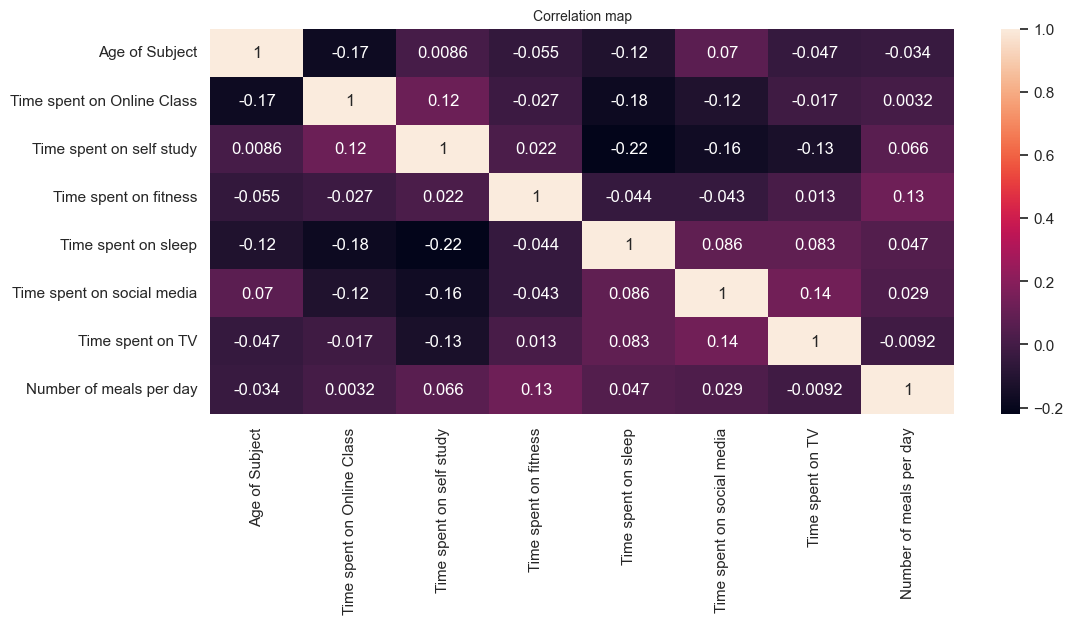

In [22]:
plt.figure(figsize=(12, 5))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation map", fontsize = 10)
plt.show()

#### Nhận xét:

- Ta thấy các cặp thuộc tính có hệ số tương quan âm nằm trong khoảng từ -0.22 đến -0.16:
    - `Age of Subject` và `Time spent on Online Class`
    - `Time spent on Online Class` và `Time spent on sleep`
    - `Time spent on self study` và `Time spent on sleep`
    - `Time spent on self study` và `Time spent on social media`
    
    Đây là một mối **tương quan âm yếu** giữa hai biến. Giá trị này cho thấy rằng khi giá trị của biến X tăng lên, giá trị của biến Y sẽ giảm xuống và ngược lại, tuy nhiên mối tương quan này không mạnh và nó có thể bị ảnh hưởng bởi một số yếu tố khác.</br></br>
    


- Ngoài các cặp thuộc tính có mối tương quan âm yếu, ta còn có các cặp có mối tương quan dương:
    - `Time spent on social media` và `Time spent on TV`.
    - `Time spent on fitness` và `Number of meals per day`
    
     Tuy nhiên, đây cũng là một mối tương quan yếu, nó có thể bị ảnh hưởng bởi một hay nhiều yếu tố khác.

### Thiết bị nào được các bạn học sinh, sinh viên sử dụng để phục vụ cho việc học online nhiều nhất. Liệu có phải thời lượng các bạn học sinh, sinh viên tham học online phụ thuộc vào Thiết bị mà các bạn đó sử dụng?

**Ý nghĩa khi trả lời câu hỏi:** 

 * Biết được thiết bị nào được sử dụng nhiều nhất bởi các bạn học sinh, sinh viên phục vụ cho việc học online.
 * Liệu thời gian học online của các bạn học sinh, sinh viên phụ thuộc vào thiết bị hay không.

**Nguồn cảm hứng đặt câu hỏi:**
* Bản thân đã trải qua kỳ học online và cảm thấy việc sử dụng Laptop/Desktop sẽ thuận tiện học trong việc học online, trong khi đó nếu sử dụng Smartphone, màn hình hiển thị nhỏ, thời lượng pin ngắn, từ đó ảnh hưởng nhiều đến trải nghiệm học.


Ta bắt đầu thống kê các loại thiết bị được sử dụng và số lượng của nó.


In [23]:
devices = df["Medium for online class"]
devices_counts = devices.value_counts()
devices_counts

Medium for online class
Laptop/Desktop                  545
Smartphone                      539
Tablet                           37
Any Gadget                        5
Smartphone or Laptop/Desktop      5
Name: count, dtype: int64

* Nhận thấy, có 3 thiết bị mà các bạn học sinh, sinh viên sử dụng chủ yếu là: `Laptop/Desktop`, `Smartphone` và `Tablet`.
* Ngoài ra còn 2 loại dữ liệu thu thập được là `Any Gadget` và `Smartphone or Laptop/Desktop`. Chúng ta sẽ không truy xét kết quả thu được từ hai loại dữ liệu này.

In [24]:
devices_counts = devices_counts.drop(labels = ['Any Gadget', 'Smartphone or Laptop/Desktop'], axis=0)
devices_counts

Medium for online class
Laptop/Desktop    545
Smartphone        539
Tablet             37
Name: count, dtype: int64

Tiếp theo, ta tiến hành trực quan hóa bằng **biểu đồ cột**. Với **biểu đồ cột**, chúng ta có thể dễ dàng trực quan hóa sự khác biệt số lượng giữa các loại thiết bị. Các cột trong biểu đồ cột rõ ràng và dễ nhìn thấy, do đó, chúng ta có thể so sánh các con số một cách trực quan và nhanh chóng.

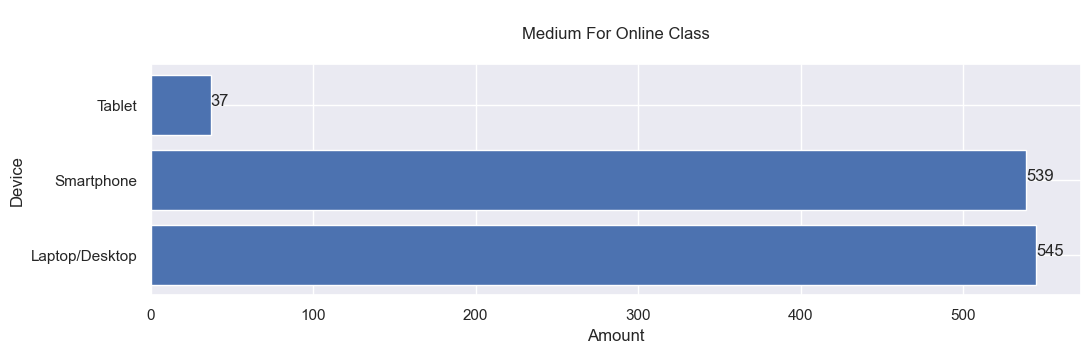

In [25]:
plt.figure(figsize=(12, 3))

plt.barh(devices_counts.index, devices_counts.values)

plt.title('\nMedium For Online Class\n')
plt.xlabel('Amount')
plt.ylabel('Device')

for i, v in enumerate(devices_counts.values):
    plt.text(v, i, str(v))

plt.show()

<h4>Nhận xét:</h4>

- Số lượng các bạn học sinh, sinh viên sử dụng **Smartphone** và **Laptop/Desktop** chiếm phần lớn. 
- Lượng người sử dụng **Tablet** ít.<br>
- Điều này cho thấy rằng thị phần của **Smartphone**, **Laptop/Desktop** lớn hơn rất nhiều so với **Tablet**.


Kế tiếp, ta sẽ tìm hiểu về thời gian trung bình dành cho việc học online theo từng loại thiết bị. Để làm được điều đó, ta lấy dữ liệu thời gian học online theo từng loại thiết bị.

In [26]:
devices_laptop_desktop = df[df['Medium for online class'] == 'Laptop/Desktop']['Time spent on Online Class']
devices_smartphone = df[df['Medium for online class'] == 'Smartphone']['Time spent on Online Class']
devices_tablet = df[df['Medium for online class'] == 'Tablet']['Time spent on Online Class']

Tính thời gian trung bình dành cho việc học online theo từng loại thiết bị.

In [27]:
devices_laptop_desktop_mean = np.mean(devices_laptop_desktop)
devices_smartphone_mean = np.mean(devices_smartphone)
devices_tablet_mean = np.mean(devices_tablet)

Ta sẽ tiếp tục chọn **biểu đồ cột** để so sánh thời gian trung bình.

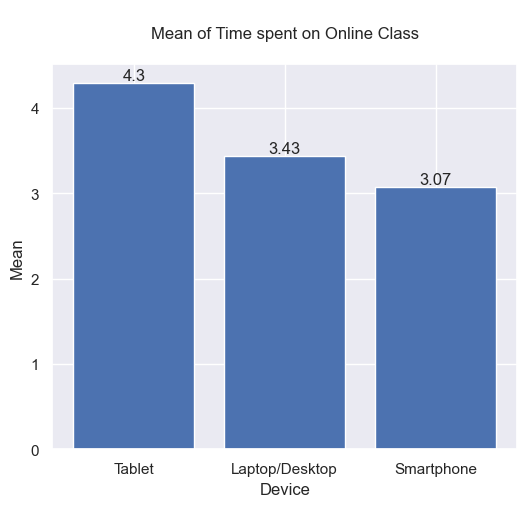

In [28]:
amount = [devices_tablet_mean, devices_laptop_desktop_mean, devices_smartphone_mean]
name = ['Tablet', 'Laptop/Desktop', 'Smartphone']

plt.figure(figsize=(6, 5))
plt.bar(name, amount)

for i, v in enumerate(amount):
    plt.text(i, v, str(v.round(2)), ha='center', va='bottom')


plt.title('\nMean of Time spent on Online Class\n')
plt.xlabel('Device')
plt.ylabel('Mean')

plt.show()

<h4>Nhận xét:</h4>

- Thời gian mà các bạn sử dụng Smartphone để học Online thấp nhất trong 3 loại thiết bị. Có thể vì một số yếu tố như màn hình nhỏ, thời lượng pin thấp, thiếu bàn phím để tương tác văn bản, vì vậy trải nghiệm học online trên thiết bị này sẽ không tốt.


###  Nền tảng mạng xã hội nào được sử dụng nhiều nhất theo độ tuổi?

**Ý nghĩa khi trả lời câu hỏi:** 

 * Biết được nền tảng mạng xã hội nào được sử dụng nhiều nhất.
 * Các độ tuổi các nhau thường sử dụng mạng xã hội nào.

**Nguồn cảm hứng đặt câu hỏi:**
* Nhận thấy tùy theo từng độ tuổi, việc sử dụng các nền tảng ứng dụng sẽ khác nhau. Ví dụ với độ tuổi từ 7 - 17 tuổi, nền tảng sử dụng nhiều nhất là Youtube, độ tuổi từ 18 - 22 thì các ứng dụng nhắn tin, chia sẻ hình ảnh như Facebook, Instagram sẽ phổ biến, còn với độ tuổi lớn hơn các ứng dụng liên quan đến nghe gọi, liên lạc sẽ chiếm tỉ lệ lớn.


Đầu tiên, thống kê các nền tảng mạng xã hội được sử dụng.

In [29]:
social_medias = (df['Prefered social media platform']).value_counts()
social_medias

Prefered social media platform
Instagram    352
WhatsApp     337
Youtube      314
Linkedin      61
Facebook      52
Twitter       28
Snapchat       8
Reddit         5
Telegram       3
Omegle         1
Elyment        1
None           1
Quora          1
Talklife       1
Name: count, dtype: int64

Ta sẽ dùng **biểu đồ tròn** để so sánh lượng người dùng giữa các nền tảng mạng xã hội.
Việc sử dụng **biểu đồ tròn** giúp:
- Hiển thị tỷ lệ phần trăm của mỗi loại mạng xã hội: Biểu đồ tròn cho phép hiển thị tỷ lệ phần trăm của mỗi loại mạng xã hội theo diện tích của các phần bằng nhau trên biểu đồ. Vì vậy, nó cho phép chúng ta dễ dàng so sánh sự phân bố của các loại mạng xã hội và xác định loại nào được sử dụng nhiều hơn.
- Trực quan hóa các sự khác biệt tỷ lệ: Với biểu đồ tròn, bạn có thể dễ dàng trực quan hóa sự khác biệt tỷ lệ giữa các loại mạng xã hội.

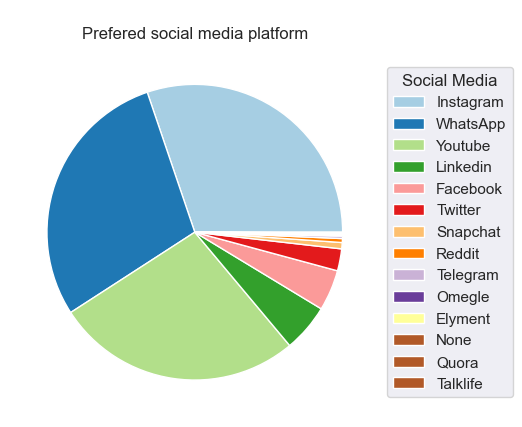

In [30]:
# Tạo danh sách màu tự động
colors = plt.cm.Paired([i for i in range(len(social_medias.index))])

# Vẽ biểu đồ hình tròn
fig, ax = plt.subplots()
wedges, autotexts = ax.pie(social_medias,textprops=dict(color="w"),  colors=colors)

# Tạo bảng chú thích
labels = [f'{label} ({val / social_medias.sum() * 100:.2f}%)' for label, val in social_medias.items()]
ax.legend(wedges, social_medias.index, title="Social Media", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("\nPrefered social media platform")

# Hiển thị biểu đồ
plt.show()

<h4>Nhận xét:</h4>

- Ba ứng dụng được sử dụng phổ biến nhất là `Instagram`, `Whatsapp`, `Youtube`. Ba ứng dụng này đại diện cho ba nền tảng khác nhau, đó là nhắn tin và chia sẻ ảnh; gọi điện và liên lạc; video giải trí.
- Có thể ba ứng dụng trên là các ứng dụng được sử dụng nhiều theo theo từng nhóm tuổi.

Tiếp đến, ta thống kê dữ liệu theo từng nhóm tuổi, chia thành 3 nhóm tuổi:
 * Nhóm 1: từ 7 - 17 tuổi
 * Nhóm 2: từ 18 - 22 tuổi
 * Nhóm 3: từ 23 - 59 tuổi


Các ứng dụng mạng xã hội bao gồm:

In [31]:
type_social_media = pd.unique((df['Prefered social media platform']))
type_social_media

array(['Linkedin', 'Youtube', 'Instagram', 'WhatsApp', nan, 'Reddit',
       'Snapchat', 'Omegle', 'Twitter', 'Telegram', 'Facebook', 'Elyment',
       'None', 'Quora', 'Talklife'], dtype=object)

Đếm số lượng người dùng theo từng nhóm tuổi.

In [32]:
social_medias_group1 = (df.loc[(df['Age of Subject'] >= 7) & (df['Age of Subject'] <= 17), 'Prefered social media platform']).value_counts().reindex(type_social_media, fill_value=0)
social_medias_group2 = (df.loc[(df['Age of Subject'] >= 18) & (df['Age of Subject'] <= 22), 'Prefered social media platform']).value_counts().reindex(type_social_media, fill_value=0)
social_medias_group3 = (df.loc[(df['Age of Subject'] >= 23) & (df['Age of Subject'] <= 59), 'Prefered social media platform']).value_counts().reindex(type_social_media, fill_value=0)

Dùng **biểu đồ cột** so sánh lượng người dùng theo từng nhóm tuổi.

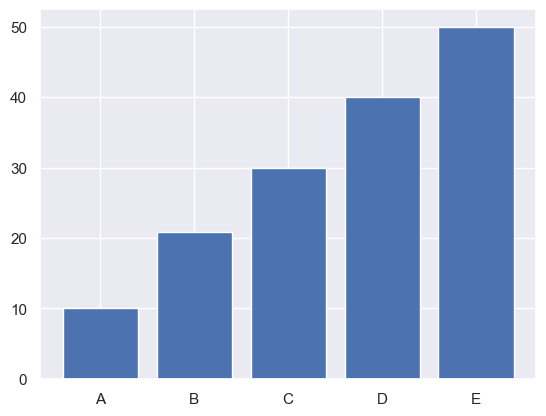

In [33]:
import matplotlib.pyplot as plt

# Tạo dữ liệu
x = ['A', 'B', 'C', 'D', 'E']
y = [10, 20.8, 30, 40, 50]

# Tạo biểu đồ
plt.bar(x, y)

# Hiển thị biểu đồ
plt.show()

In [34]:
social_medias_group1.index

Index([ 'Linkedin',   'Youtube', 'Instagram',  'WhatsApp',         nan,
          'Reddit',  'Snapchat',    'Omegle',   'Twitter',  'Telegram',
        'Facebook',   'Elyment',      'None',     'Quora',  'Talklife'],
      dtype='object', name='Prefered social media platform')

In [35]:
social_medias_group1.values

array([  0, 118,  51, 105,   0,   2,   3,   0,   1,   1,  11,   0,   1,
         0,   0], dtype=int64)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20320\26889450.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(social_medias_group1.index,rotation=45)


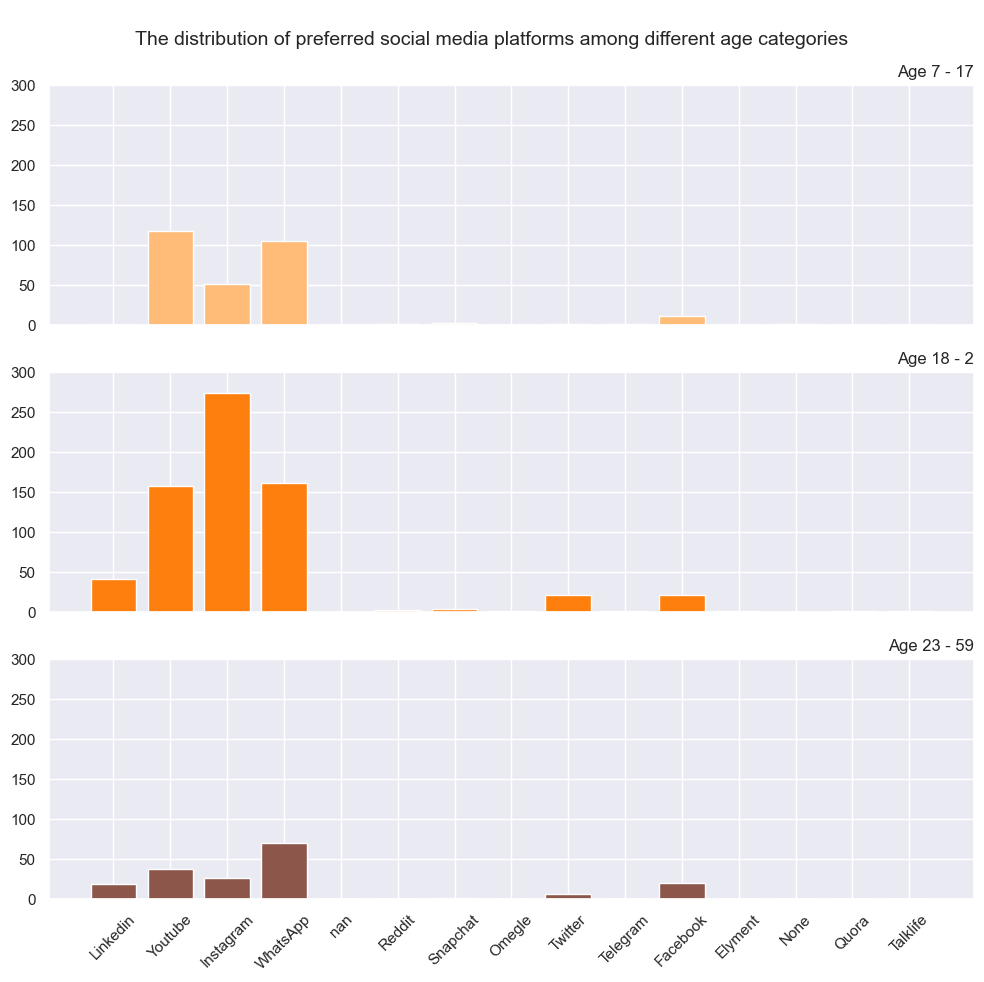

In [36]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))

axs[0].bar(social_medias_group1.index.astype(str), social_medias_group1.values, color='#ffbb78')
axs[0].set_xticklabels('',rotation=45)
axs[0].set_title('Age 7 - 17', loc='right')

axs[1].bar(social_medias_group2.index.astype(str), social_medias_group2.values, color='#ff7f0e')
axs[1].set_xticklabels('',rotation=45)
axs[1].set_title('Age 18 - 2', loc='right')

axs[2].bar(social_medias_group3.index.astype(str), social_medias_group3.values,color='#8c564b')
axs[2].set_xticklabels(social_medias_group1.index,rotation=45)
axs[2].set_title('Age 23 - 59', loc='right')

fig.subplots_adjust(hspace=0.07)

fig.suptitle('\nThe distribution of preferred social media platforms among different age categories', fontsize=14)

for ax in axs:
    ax.set_ylim([0, 300])

plt.tight_layout()
plt.show()

<h4>Nhận xét:</h4>

- Theo kết quả phân tích, đối với từng nhóm độ tuổi thì việc sử dụng các nền tảng mạng xã hội sẽ khác nhau:
    - Nhóm tuổi 7 - 17: nền tảng sử dụng chủ yếu là `Youtube` và `WhatsApp`, chủ yếu dùng để xem video giải trí và sử dụng để liên lạc.
    - Nhóm tuổi 18 - 22: `Instagram` là ứng dụng được sủ dụng nhiều nhất, ở nhóm tuổi này, người dùng có xu hướng muốn chia sẻ nhiều hơn thông qua hình ảnh, video.
    - Nhóm tuổi 23 - 59: ứng dụng nhắn tin, liên lạc `WhatsApp` được sử dụng nhiều nhất.


### Liệu có mối quan hệ nào giữa thuộc tính Time spent on Online Class và Medium for online class đối với Rating of Online Class experience?

**Ý nghĩa khi trả lời câu hỏi:** 

- Tìm hiểu xem sử dụng các loại thiết bị khác nhau có giúp trải nghiệm lớp học online được cải thiện tốt hơn không.
- Đồng thời cũng xác định được số giờ trải nghiệm lớp học online của từng loại thiết bị khác nhau như thế nào.

**Nguồn cảm hứng đặt câu hỏi:**

- Học sinh hiện nay sử dụng rất đa dạng các thiết bị khác nhau để tham gia trực tuyến lớp học. Nhóm mình đặt ra câu hỏi là liệu có những đánh giá thế nào khi trải nghiệm với mỗi loại thiết bị đó. Liệu có tìm ra được thiết bị nào đem đến những trải nghiệm tuyệt vời nhất cho người dùng không?
 

Đầu tiên, ta sẽ kiểm tra những dòng bị thiếu dữ liệu.

In [37]:
len(df[df['Rating of Online Class experience'].isna()])

24

In [38]:
len(df[df['Medium for online class'].isna()])

51

In [39]:
len(df[df['Time spent on Online Class'].isna()])

0

Như vậy, ta có 2 cột `categorical` cần phân tích có dữ liệu thiếu. Do đó, ta sẽ tiến hành xử lý những cột này bằng cách điền vào giá trị `mode` của cột được xử lý.

In [40]:
m1 = df['Medium for online class'].mode()[0]
df['Medium for online class']=df['Medium for online class'].fillna(m1)

In [41]:
m2 = df['Rating of Online Class experience'].mode()[0]
df['Rating of Online Class experience']=df['Rating of Online Class experience'].fillna(m2)

Tiếp theo, ta tiến hành phân tích dữ liệu và tiến hành trực quan hoá.

In [42]:
copy = df.copy()

Thực hiện gom nhóm các rating và tính tổng thời gian dành ra cho online class ứng với từng thiết bị.

In [43]:
copy_4 = copy.groupby(['Medium for online class','Rating of Online Class experience'])[['Time spent on Online Class']].sum()
copy_4

Time spent on Online Class
Medium for online class      Rating of Online Class experience                            
Any Gadget                   Average                                                  6.00
                             Good                                                    13.00
                             Very poor                                                6.00
Laptop/Desktop               Average                                                741.50
                             Excellent                                              183.50
                             Good                                                   420.50
                             Poor                                                    30.25
                             Very poor                                              558.00
Smartphone                   Average                                                585.75
                             Excellent                                              136.50
                             Good                                                   317.25
                             Poor                                                    34.10
                             Very poor                                              580.50
Smartphone or Laptop/Desktop Average                                                  5.00
                             Excellent                                                9.00
                             Good                                                     3.00
                             Poor                                                     4.00
Tablet                       Average                                                 40.00
                             Excellent                                               22.00
                             Good                                                    63.00
                             Very poor                                               34.00

Ở đây, khi trực quan ta cần xem các thành phần của từng đối tượng so với tổng thể nên có thể sử dụng các cách trực quan như sau:

#### Trực quan bằng biểu đồ tròn

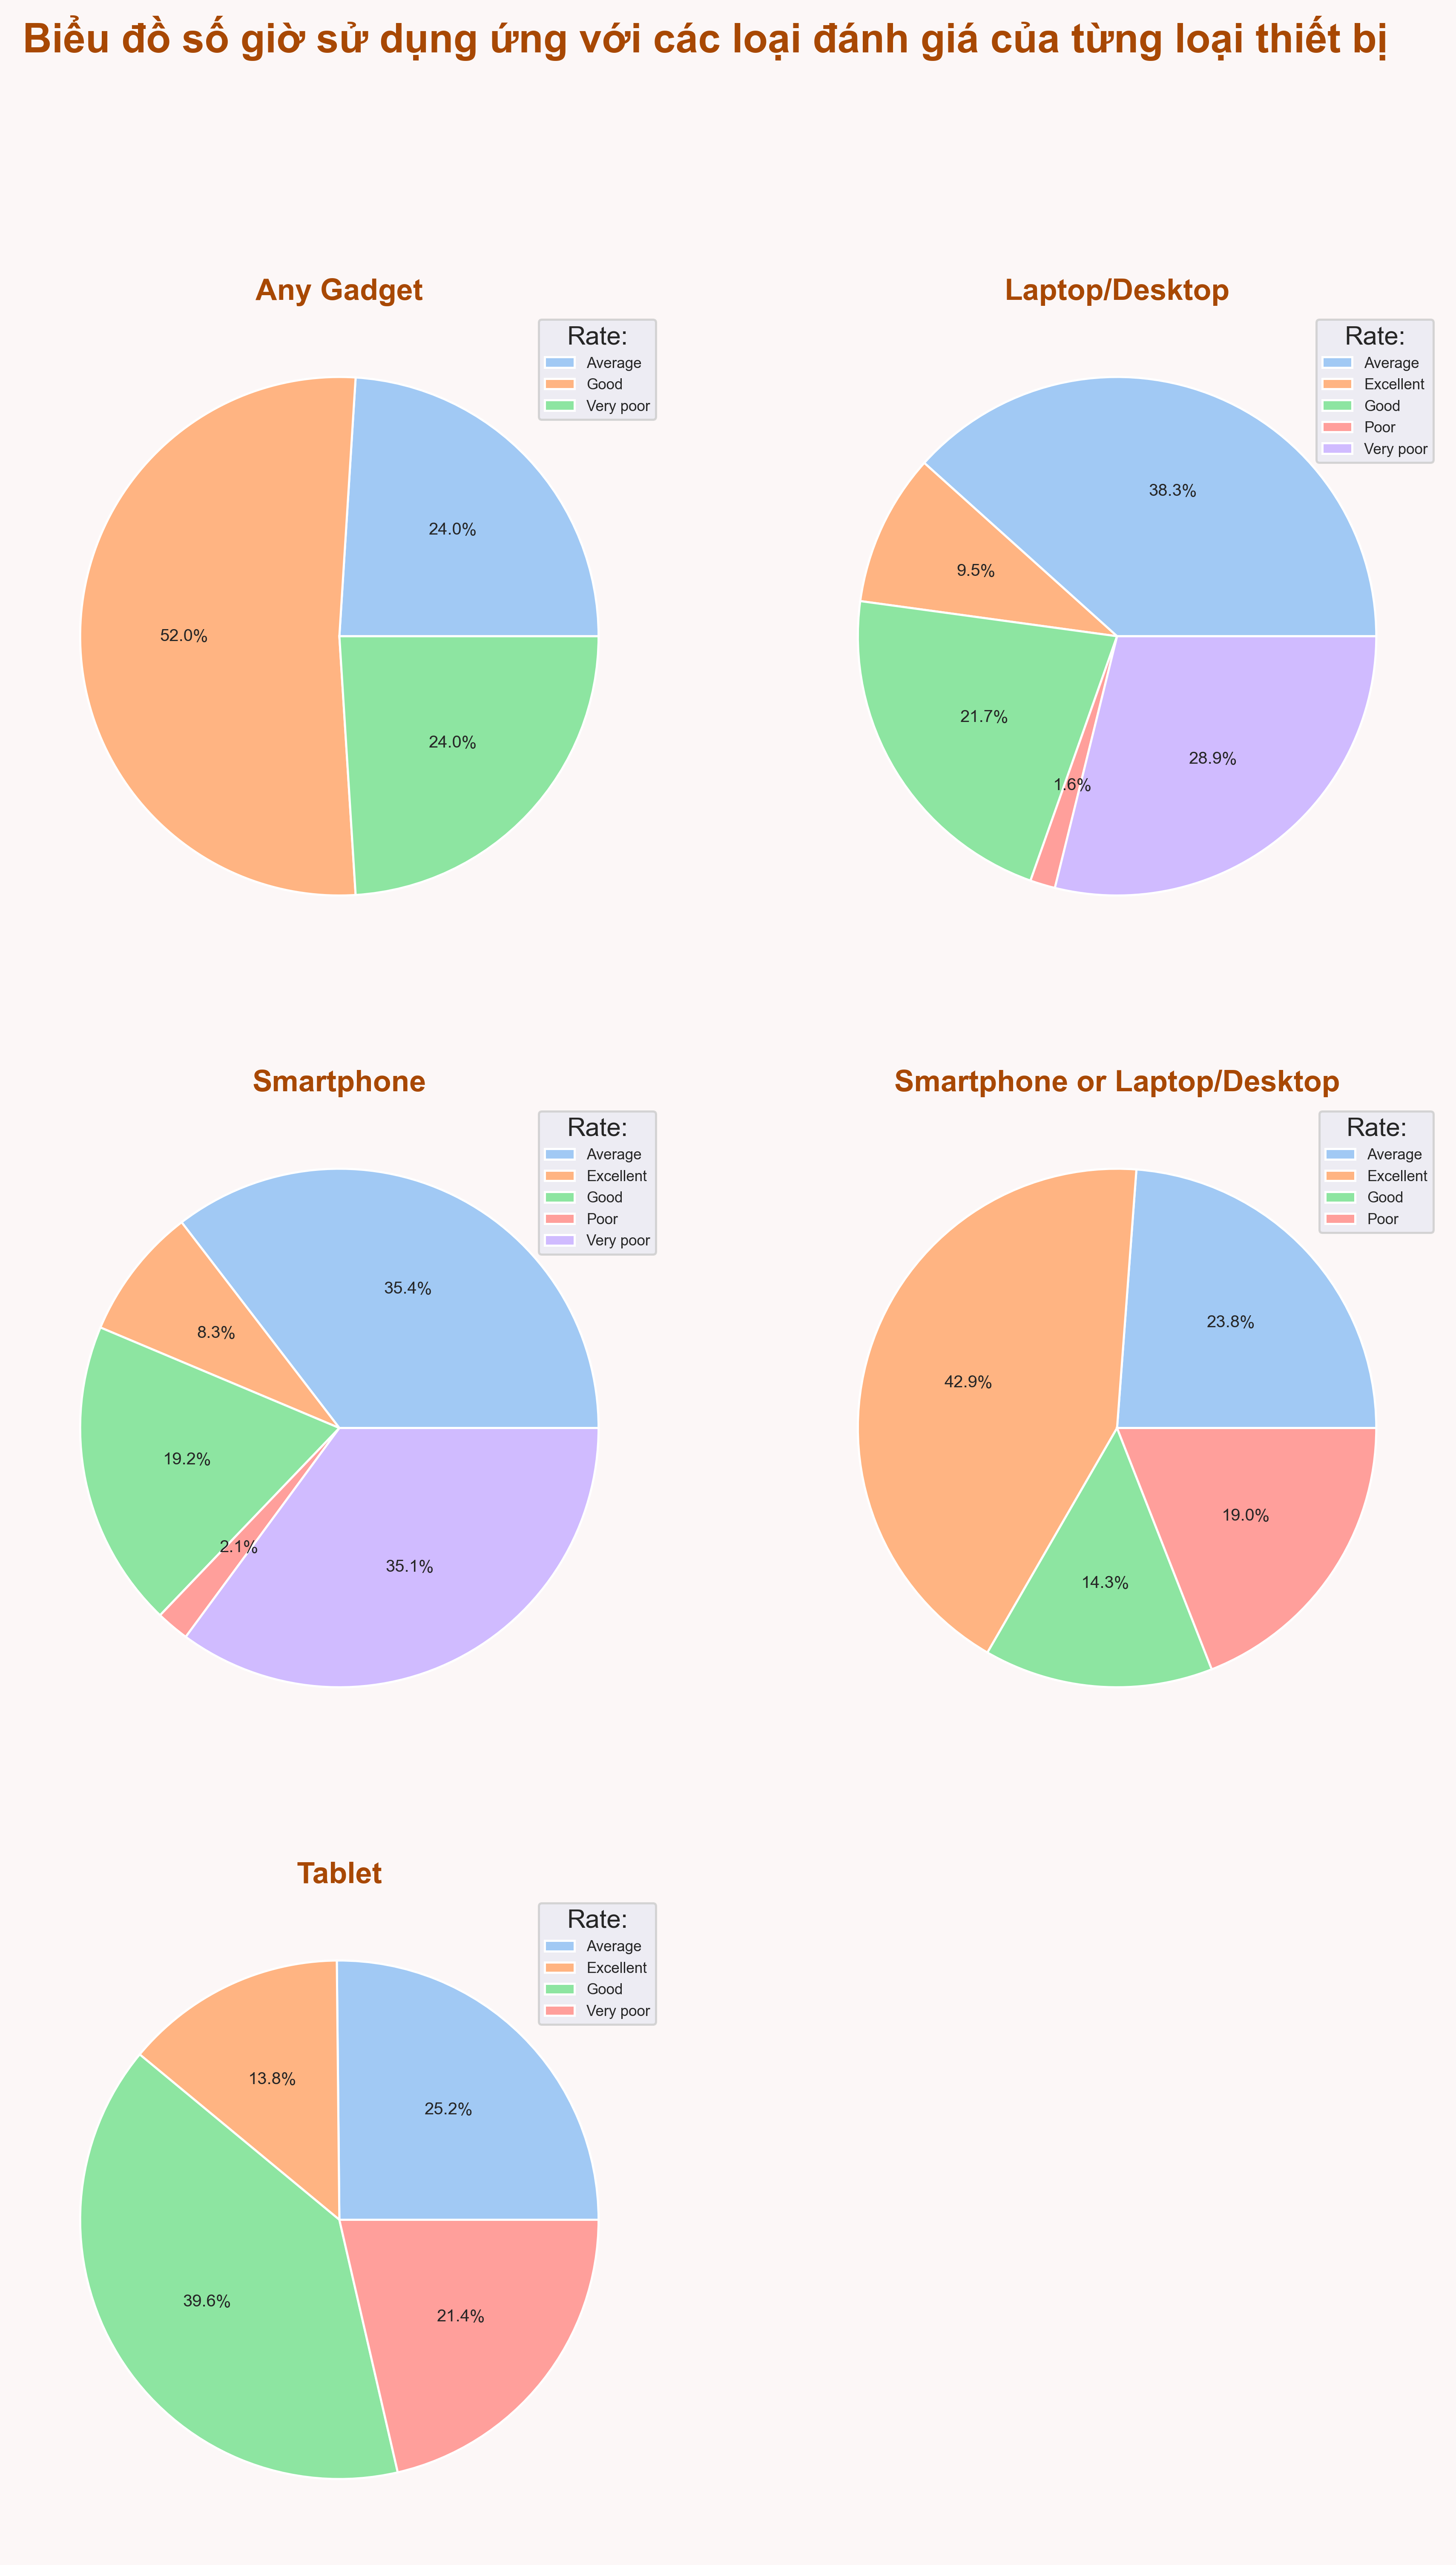

In [44]:
rating = ['Excellent', 'Good', 'Average', 'Poor', 'Very poor']
medium = ['Any Gadget', 'Laptop/Desktop', 'Smartphone', 'Smartphone or Laptop/Desktop', 'Tablet']
plt.rcParams['figure.dpi'] = 360
palette_color = sns.color_palette('pastel')
c1=0
c2=0
fig, axes = plt.subplots(3,2, figsize=(12, 19),facecolor='#fcf7f7')
fig.suptitle('Biểu đồ số giờ sử dụng ứng với các loại đánh giá của từng loại thiết bị', fontsize=19, weight='bold', color = '#a84803')
for i,c in enumerate(medium):
    d=copy_4.loc[c].reset_index()
    data = d['Time spent on Online Class']
    keys = d['Rating of Online Class experience']
    if c2==2:
        c1+=1
        c2=0
    axes[c1][c2].pie(data , colors=palette_color, autopct='%.1f%%', textprops={'fontsize': 8})
    axes[c1][c2].legend(title = "Rate:",labels=keys,loc='upper right',fontsize=7)
    axes[c1][c2].set_title(c, size=14, color = '#a84803', weight='bold')
    c2+=1
axes[2,1].set_axis_off()
plt.show()

#### Nhận xét:
- Khi sử dụng thiết bị bất kỳ thì chỉ có 3 loại đánh giá `Good`, `Average`, `Very poor`. Ta có thể thấy đánh giá `Good` có số giờ tham gia lớp online cao hơn tổng 2 lượng đánh giá còn lại.
- Với `Laptop/Desktop` thì có đủ 5 loại đánh giá. Đánh giá `Poor` có số giờ tuy không đáng kể nhưng tổng số giờ của người thực hiện đánh giá tiêu cực vẫn chiếm hơn 25%.
- Với chỉ riêng `Smartphone` thì có đủ 5 loại đánh giá. Số giờ tham gia của đánh giá `Poor` chiếm rất nhỏ, nhưng tổng số giờ tham gia lớp online của người thực hiện đánh giá `Very poor` lại khá cao, dẫn đến số giờ của lượng đánh giá tiêu cực vượt quá 1/3 tổng số.
- Với `Smartphone` hoặc `Laptop/Desktop` thì không có đánh giá `Very poor`, thay vào đó, tổng số giờ tham gia lớp online của lượng đánh giá `Poor`lại cao hơn hẳn. Nhưng tổng quan thì số giờ của lượng đánh giá tiêu cực vẫn thấp, chiếm thấp hơn 1/5 tổng số. Đặc biệt, số giờ tham gia lớp online được đánh giá `Excellent` khá cao.
- Với `Tablet` thì không có đánh giá `Poor` và số giờ tham gia lớp online của lượng đánh giá `Very poor` cũng không chiếm quá nhiều so với những biểu đồ còn lại. Số giờ tham gia lớp online của những người đánh giá tích cực cũng rất cao.


#### Kết luận:
- Dựa theo các biểu đồ trên, ta có thể thấy, để có những trải nghiệm tốt hơn với các lớp học online, ta cần sử dụng `Smartphone` kết hợp với `Laptop/Desktop` hoặc là dùng `Tablet`.

### Khám phá mối quan hệ giữa các thuộc tính `Time ...` đến thuộc tính `Time utilized`.

**Ý nghĩa khi trả lời câu hỏi:** 
 * 2 trường hợp:
    * Có mối quan hệ: dựa vào mô hình, mối quan hệ để xác định biến (thuộc tính) nào đóng vai trò quan trọng trong mô hình.
    * Không có mối quan hệ: Đưa ra kết luận việc tối ưu hóa được thời gian tùy thuộc vào mục đích sử dụng thời gian của từng sinh viên/học sinh.

**Nguồn cảm hứng đặt câu hỏi:**
* Biết thêm sức ảnh hưởng của COVID-19 đến nền giáo dục (Ấn Độ).
* Để có thể xem xét tối ưu được thời gian biểu của bản thân.

Ta tiến hành lấy dữ liệu liên quan, thực hiện tiền xử lý cho dữ liệu.

In [45]:
time_columns = df.filter(regex='Time.*', axis=1).columns
time_columns

Index(['Time spent on Online Class', 'Time spent on self study',
       'Time spent on fitness', 'Time spent on sleep',
       'Time spent on social media', 'Time spent on TV', 'Time utilized'],
      dtype='object')

Lấy ra các cột mà tên cột có liên quan đến 'Time' và lưu vào DataFrame `qs1_df`.

In [46]:
qs1_df = df.loc[:,time_columns].copy()
qs1_df

Time spent on Online Class  Time spent on self study  \
0                            2.0                       4.0   
1                            0.0                       0.0   
2                            7.0                       3.0   
3                            3.0                       2.0   
4                            3.0                       3.0   
...                          ...                       ...   
1177                         3.0                       4.0   
1178                         6.0                       4.0   
1179                         4.0                       0.0   
1180                         5.0                       3.5   
1181                         5.0                       2.0   

      Time spent on fitness  Time spent on sleep  Time spent on social media  \
0                       0.0                  7.0                         3.0   
1                       2.0                 10.0                         3.0   
2                       0.0                  6.0                         2.0   
3                       1.0                  6.0                         5.0   
4                       1.0                  8.0                         3.0   
...                     ...                  ...                         ...   
1177                    1.0                  8.0                         1.0   
1178                    1.0                  9.0                         1.0   
1179                    0.5                  8.0                         3.0   
1180                    1.0                  8.0                         0.5   
1181                    0.5                  7.0                         1.0   

      Time spent on TV Time utilized  
0                  1.0           YES  
1                  0.0           YES  
2                  0.0            NO  
3                  0.0            NO  
4                  1.0            NO  
...                ...           ...  
1177               2.0           YES  
1178               1.0           YES  
1179               2.0            NO  
1180               1.0           YES  
1181               1.0           YES  

[1182 rows x 7 columns]

Tiếp theo, ta tiến hành kiểm tra có mẫu có thời gian vượt quá 24 giờ không? Nếu mẫu vượt quá 24 giờ thì xóa các mẫu vi phạm.

In [47]:
qs1_df["Total"]=qs1_df.iloc[:,0:-1].sum(axis=1)
qs1_df[qs1_df.Total>24.0].__len__()

56

In [48]:
qs1_df=qs1_df[qs1_df.Total<=24.0].iloc[:,0:-1].reset_index(drop=True)
qs1_df.shape

(1126, 7)

Sau đó, tiếp tục xử lý cột `Time utilized` bằng cách thay đổi giá trị: 
- YES -> 1
- NO -> 0

In [49]:
qs1_df["Time utilized"]=qs1_df.iloc[:,-1].replace(['YES','NO'],[1,0],regex=True)

Ta sẽ dùng **biểu đồ boxplot** để quan sát được phân bố các thuộc tính theo nhãn của thuộc tính `Time utilized`.

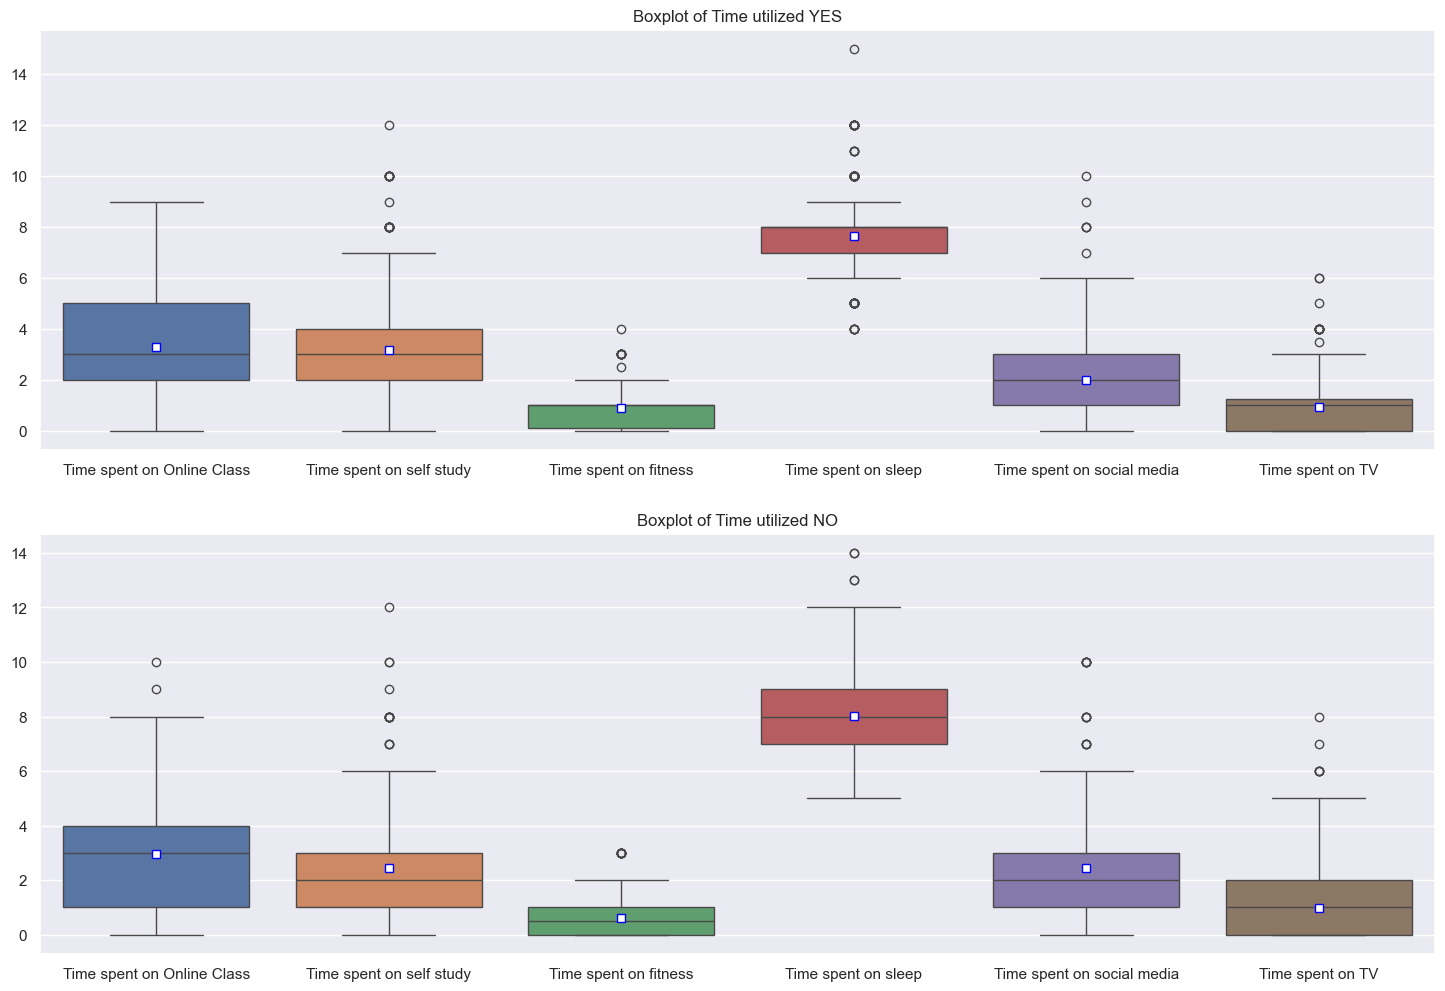

In [50]:
plt.rcdefaults()
sns.set_theme()
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(18,12))

sns.boxplot(data=qs1_df[qs1_df["Time utilized"]==1].iloc[:,0:-1],showmeans=True,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},ax=ax1)
ax1.set_title("Boxplot of Time utilized YES")

sns.boxplot(data=qs1_df[qs1_df["Time utilized"]==0].iloc[:,0:-1],showmeans=True,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},ax=ax2)
ax2.set_title("Boxplot of Time utilized NO")

plt.show()

#### Nhận xét:
- **Biểu đồ Boxplot of Time utilized YES**<br>
    - Có khoảng biến thiên tứ phân vị (IQR) **cao** hơn ở các thuộc tính `Time spent onn Online Class`, `Time spent on self study`.<br>
    - Giá trị meadian ở thuộc tính `Time spent on fitness`, `Time spent on sleep` trùng với giá trị của tứ phân vị.<br><br>
- **Biểu đồ Boxplot of Time utilized NO**<br>
    - Có phân bố của thuộc tính `Time spent on sleep`, `Time spent on TV` rộng hơn.

**Biểu đồ cột chồng** giúp ta quan sát được tỉ lệ số mẫu tối ưu hóa thời gian trong từng thuộc tính.

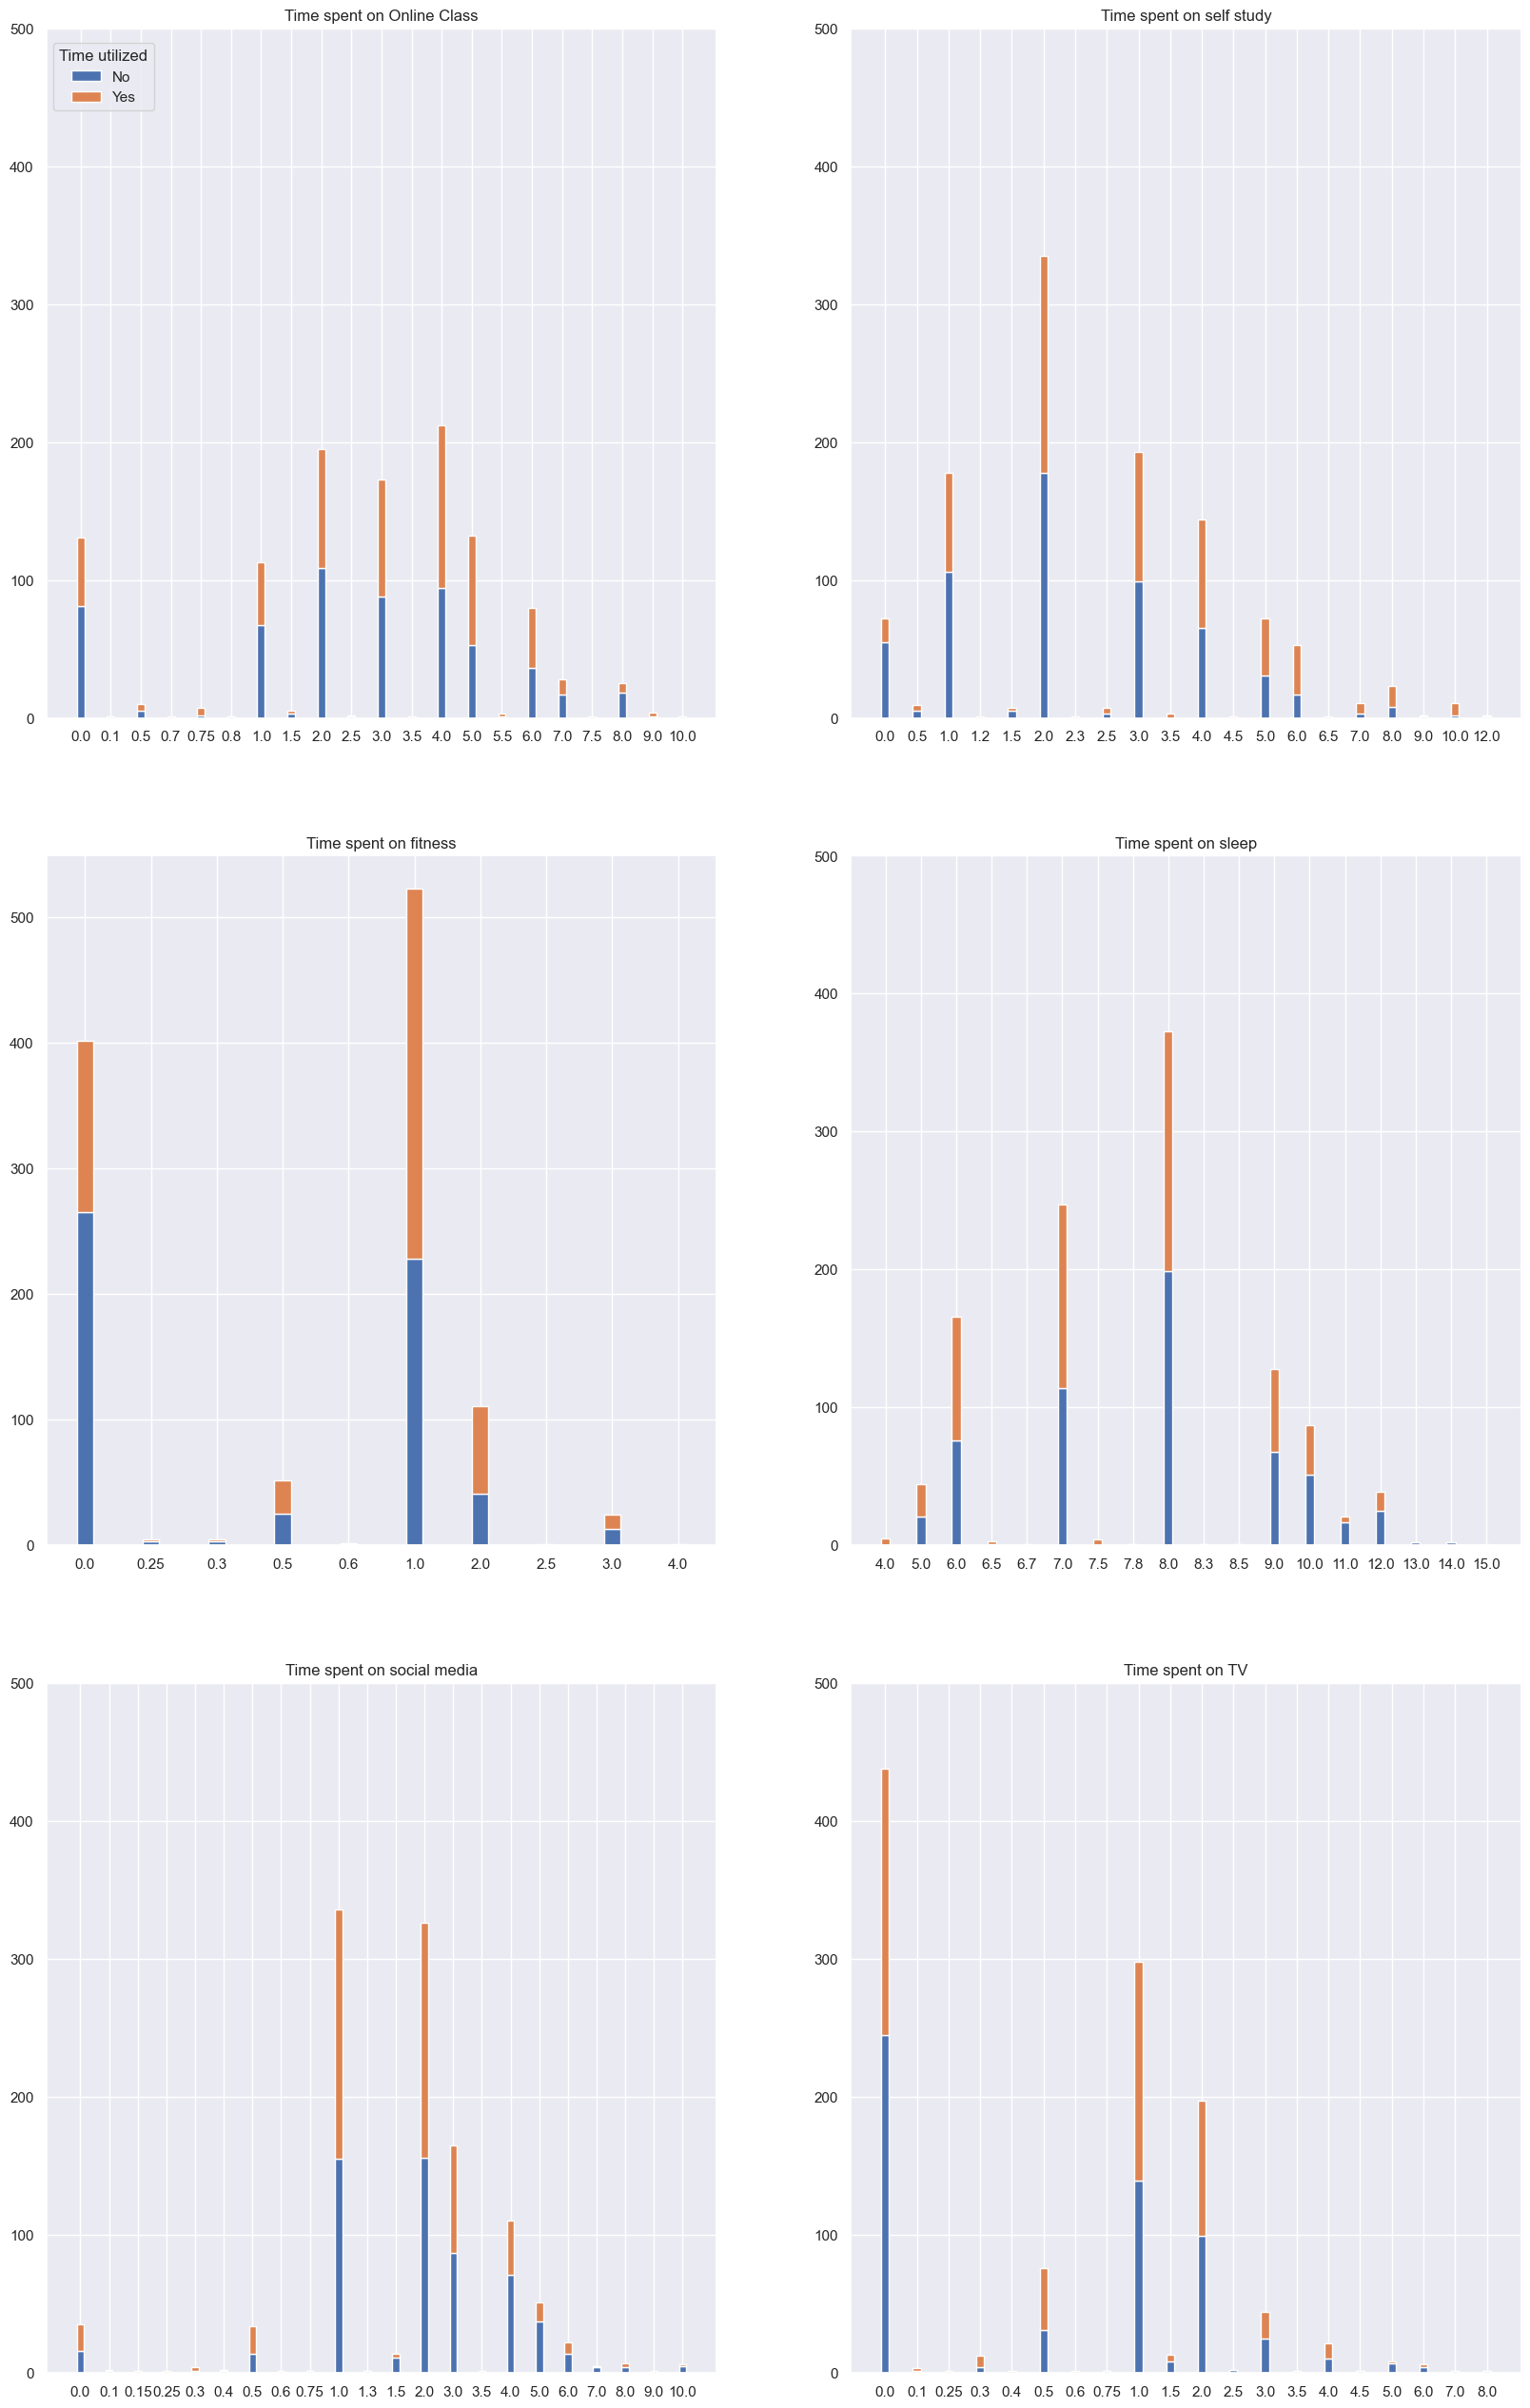

In [51]:
fig, axes = plt.subplots(3,2,figsize=(20,32))
index_fig=[(3,2,1),(3,2,2),(3,2,3),(3,2,4),(3,2,5),(3,2,6)]
barWidth=0.25
for c,(nrows, ncols, plot_number) in zip(qs1_df.columns[:-1],index_fig):
    temp=qs1_df.value_counts(subset=[c,"Time utilized"]).unstack().fillna(0)
    br1 = np.arange(0,len(temp))
    plt.subplot(nrows, ncols, plot_number).bar(br1,temp[0].values,width=0.25,label="No")
    plt.subplot(nrows, ncols, plot_number).bar(br1,temp[1].values,width=0.25,bottom=temp[0],label="Yes")
    plt.xticks(br1,temp.index.astype(str))
    plt.yticks(np.linspace(0,500,6))
    plt.subplot(nrows, ncols, plot_number).set_title(f'{c}')

plt.legend(title='Time utilized',loc='center left',bbox_to_anchor=(-1.2,3.33))
plt.show()

#### Nhận xét:
- Ở các giá trị chiếm phần lớn dữ liệu thường có tỉ lệ giữa `Time utilized==NO` và `Time utilized==YES` xấp xỉ 1/2.

    *Note: Vì ở số biểu đồ có độ chênh lệch khoảng cách lớn khó cho việc biểu diễn theo trục hoành (Ví dụ: ở biểu đồ`Time spent on Online Class`: khoảng cách [0 - 10] gấp 100 [0 - 0.1], dẫn đến hiện tượng vẽ đúng tỉ lệ sẽ không thấy rõ được cột), nên nhóm đã ép kiểu dữ liệu của các thuộc tính về `categorical`(chỉ manng tính tạm thời trong biểu đồ này).*

**Biểu đồ đường:** Thấy được rõ độ dao động giữa nhãn của `Time utilized` trong các thuộc tính `Time`.

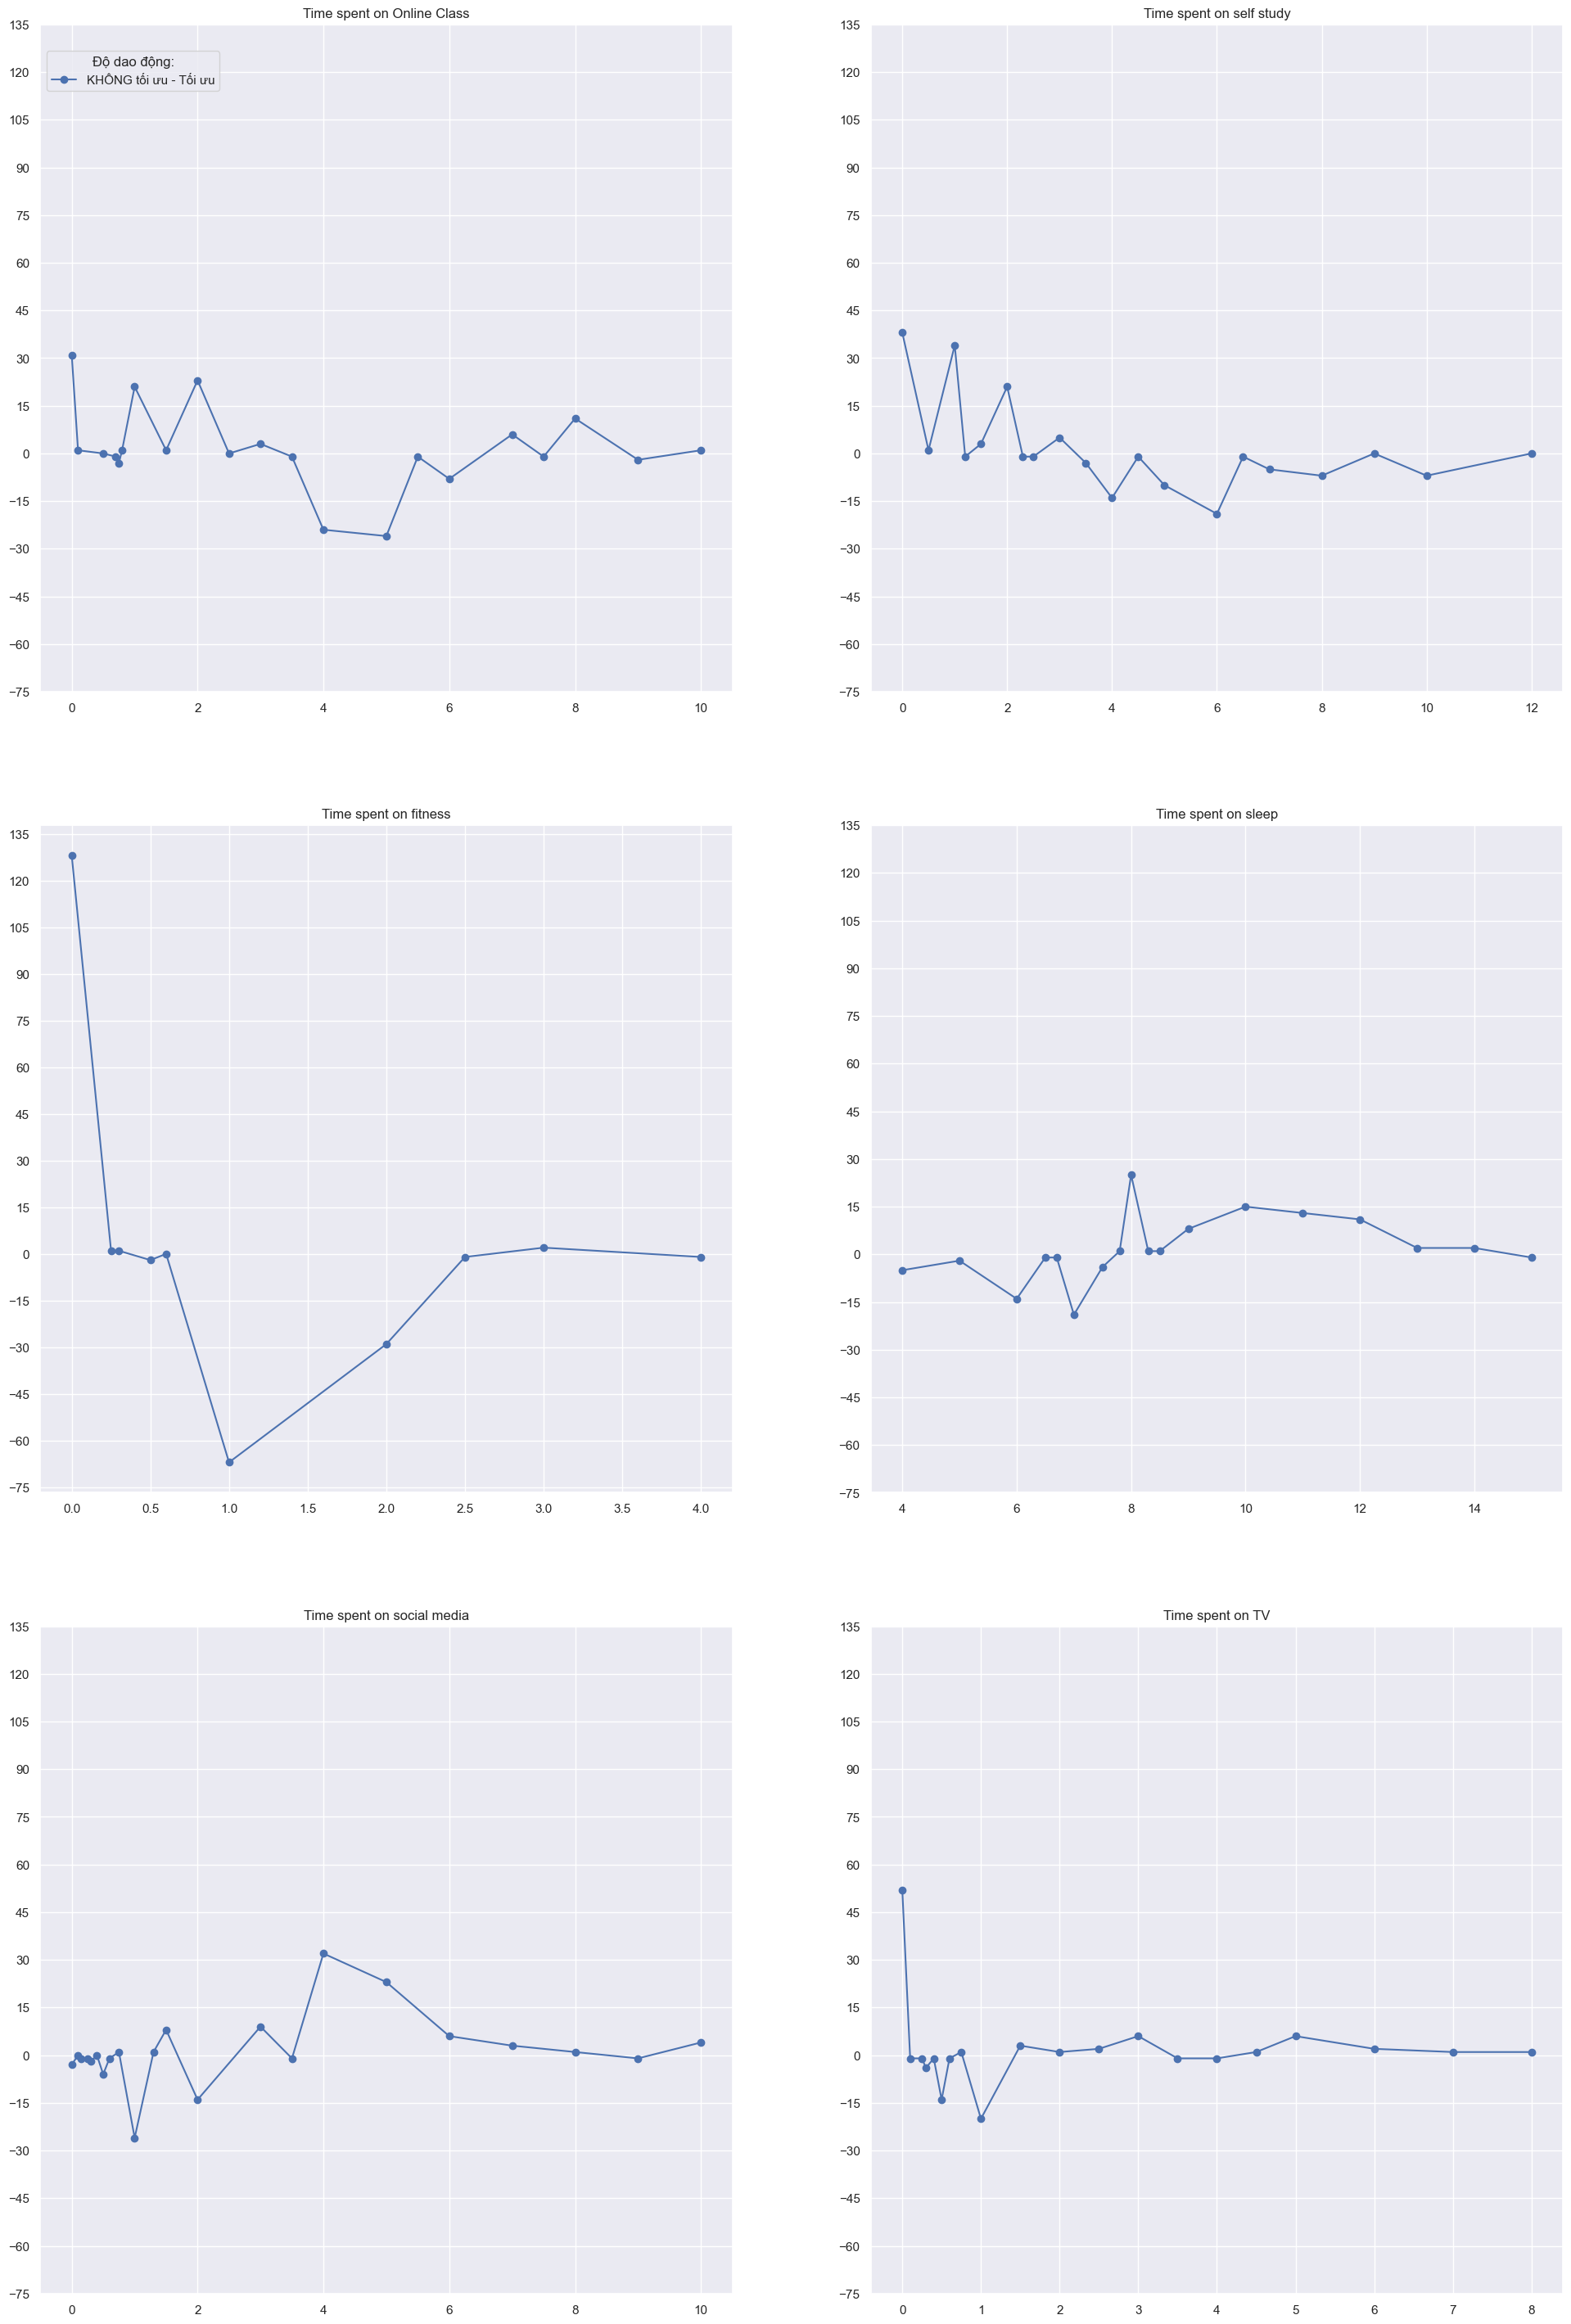

In [52]:
fig, axes = plt.subplots(3,2,figsize=(24,36))
index_fig=[(3,2,1),(3,2,2),(3,2,3),(3,2,4),(3,2,5),(3,2,6)]
barWidth=0.25
for c,(nrows, ncols, plot_number) in zip(qs1_df.columns[:-1],index_fig):
    temp=qs1_df.value_counts(subset=[c,"Time utilized"]).unstack().fillna(0)
    br1 = np.arange(0,len(temp))
    plt.subplot(nrows, ncols, plot_number).plot(temp.index,temp[0].values-temp[1].values,marker='o',linestyle='-',label="KHÔNG tối ưu - Tối ưu")
    plt.yticks(np.arange(-75,125+15,15))
    plt.subplot(nrows, ncols, plot_number).set_title(f'{c}')
plt.legend(title='Độ dao động:',loc='center left',bbox_to_anchor=(-1.2,3.33))
plt.show()

#### Nhận xét:
- Dựa vào biểu đồ ta có thể đọc được có 1 số khoảng thì lượng người cảm thấy **tối ưu** thời gian chiếm nhiều hơn so với người **Không tối ưu** thời gian. Và ngược lại.
- Dao động của `Time spent on fitness` lớn nhất.
- Dao động của `Time spent on sleep` và `Time spent on TV` ổn định hơn so với các thuộc tính khác.

In [53]:
qs1_df.columns

Index(['Time spent on Online Class', 'Time spent on self study',
       'Time spent on fitness', 'Time spent on sleep',
       'Time spent on social media', 'Time spent on TV', 'Time utilized'],
      dtype='object')

### Có phải những người mắc vấn đề sức khỏe trong quá trình đóng cửa xã hội, thường là những đối tượng có max hoặc min trong 1 thuộc tính hay tương quan với thuộc tính nào đó hay không?

**Ý nghĩa khi trả lời câu hỏi:**    
- Tìm ra nguyên nhân khác gây ra các vấn đề về sức khỏe cho sinh viên ngoài trừ việc mắc covid từ đó củng cố các thói quen sinh hoạt và hạn chế mắc phải vấn đề về sức khỏe.

**Nguồn cảm hứng đặt câu hỏi:**
- Xuất từ việc muốn bảo vệ sức khỏe - thứ không thể mua được bằng tiền.
- Để có thể hiểu thêm về các ngưỡng mà các tác nhân có thể gây hại cho sức khỏe chúng ta.

**Hướng thực hiện:**
- Trược quan làm rỏ các thuộc tính có ảnh hưởng đến `Health issue during lockdown`.
- Xây dựng mô hình học máy từ các hành vi hay kết quả của hành vi và dự đoán có xảy ra vấn đề về sức khỏe hay không.

#### Tương quan 2 thuộc tính `Health issue during lockdown` và `Time utilized`

Xem xét thuộc tính `Health issue during lockdown` và `Time utilized`.

In [54]:
df['Health issue during lockdown'].value_counts()

Health issue during lockdown
NO     1021
YES     161
Name: count, dtype: int64

In [55]:
df['Time utilized'].value_counts()

Time utilized
NO     608
YES    574
Name: count, dtype: int64

Xem xét thuộc tính `Health issue during lockdown` biết `Time utilized` là YES.

In [56]:
TU_Y1 = df[df['Time utilized'] == 'YES'][df['Health issue during lockdown'] == 'YES'].shape[0]
TU_Y2 = df[df['Time utilized'] == 'YES'][df['Health issue during lockdown'] == 'NO'].shape[0]
TU_Y1, TU_Y2

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20320\2253813917.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TU_Y1 = df[df['Time utilized'] == 'YES'][df['Health issue during lockdown'] == 'YES'].shape[0]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20320\2253813917.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TU_Y2 = df[df['Time utilized'] == 'YES'][df['Health issue during lockdown'] == 'NO'].shape[0]


(59, 515)

Xem xét thuộc tính `Time utilized` biết `Health issue during lockdown` là YES.

In [57]:
H_Y1 = df[df['Health issue during lockdown'] == 'YES'][df['Time utilized'] == 'YES'].shape[0]
H_Y2 = df[df['Health issue during lockdown'] == 'YES'][df['Time utilized'] == 'NO'].shape[0]
H_Y1, H_Y2

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20320\2461240161.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  H_Y1 = df[df['Health issue during lockdown'] == 'YES'][df['Time utilized'] == 'YES'].shape[0]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20320\2461240161.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  H_Y2 = df[df['Health issue during lockdown'] == 'YES'][df['Time utilized'] == 'NO'].shape[0]


(59, 102)

Ta sẽ dùng **biểu đồ tròn** để trực quan. Biểu đồ tròn giúp ta dễ dàng thấy được tỉ lệ chiếm của hai thuộc tính trên.

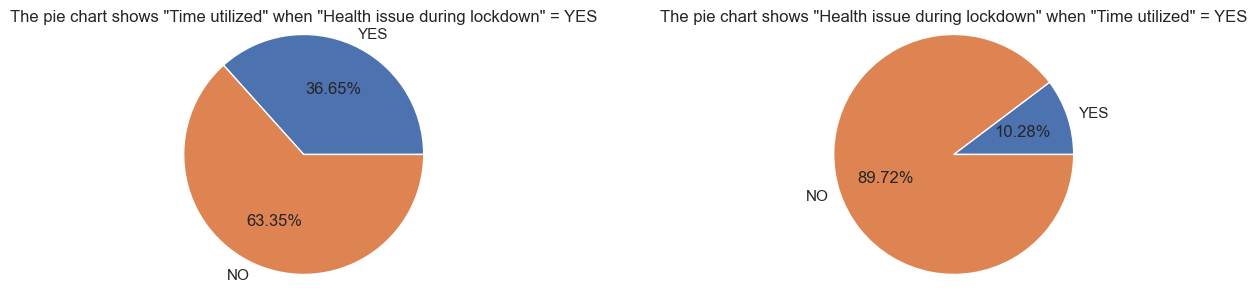

In [58]:
labels = ['YES', 'NO'] 
fracs1 = [H_Y1, H_Y2]
fracs2 = [TU_Y1, TU_Y2]

fig = plt.figure(figsize =(13, 5))
ax1 = fig.add_axes([0, 0, .5, .5], aspect = 1)
ax1.pie(fracs1, labels = labels, radius = 1.2, autopct='%1.2f%%')
ax1.set_title('The pie chart shows "Time utilized" when "Health issue during lockdown" = YES')

ax2 = fig.add_axes([.5, .0, .5, .5], aspect = 1)
ax2.pie(fracs2, labels = labels, radius = 1.2, autopct='%1.2f%%')
ax2.set_title('The pie chart shows "Health issue during lockdown" when "Time utilized" = YES')
plt.show()

#### Nhận xét:
- Biểu đồ thứ nhất cho thấy khi đã có vấn đề sức khỏe thì hơn 63% trong số họ đã sử dụng thời gian một cách không hợp lý.
- Biểu đồ thứ hai cho thấy rằng khi đã sử dụng thời gian một cách hợp lý thì việc có vấn đề sức khỏe hiếm có thể xảy ra (khoảng 10%).

#### Xét thuộc tính `Number of meals per day`
- Dựa vào `Health issue during lockdown` là NO để có dữ liệu nhiều hơn, rõ ràng hơn trong việc trực quan.

Ta tiến hành thống kê **số lượng người ăn x bữa** một ngày. Nghĩa là ta sẽ thống kê lần lượt số người chỉ ăn 1 bữa, ăn 2 bữa, ... mỗi ngày.

In [59]:
sum_pp = df['Number of meals per day'].value_counts()
sum_pp = sum_pp.sort_index()
sum_pp

Number of meals per day
1     41
2    287
3    610
4    229
5      8
6      2
7      4
8      1
Name: count, dtype: int64

Thống kê tiếp **số lượng người ăn x bữa** một ngày mà **không** có vấn đề sức khỏe.

In [60]:
sum_pp_N = df[df['Health issue during lockdown'] == 'NO']['Number of meals per day'].value_counts()
sum_pp_N = sum_pp_N.sort_index()
sum_pp_N

Number of meals per day
1     32
2    235
3    534
4    206
5      7
6      2
7      4
8      1
Name: count, dtype: int64

Kế tiếp, tính tỉ lệ giữa **số người ăn x bữa một ngày mà không có vấn đề sức khỏe** với **số người ăn x bữa một ngày**.

In [61]:
ratio = df[df['Health issue during lockdown'] == 'NO']['Number of meals per day'].value_counts()/ df['Number of meals per day'].value_counts()
ratio = ratio.sort_index()
ratio

Number of meals per day
1    0.780488
2    0.818815
3    0.875410
4    0.899563
5    0.875000
6    1.000000
7    1.000000
8    1.000000
Name: count, dtype: float64

Ta sẽ dùng **biểu đồ cột** kết hợp với **biểu đồ đường** để trực quan. Cột thể hiện tỉ lệ theo thang đo bên trái, đường thể hiện số lượng người theo thang đo bên phải.


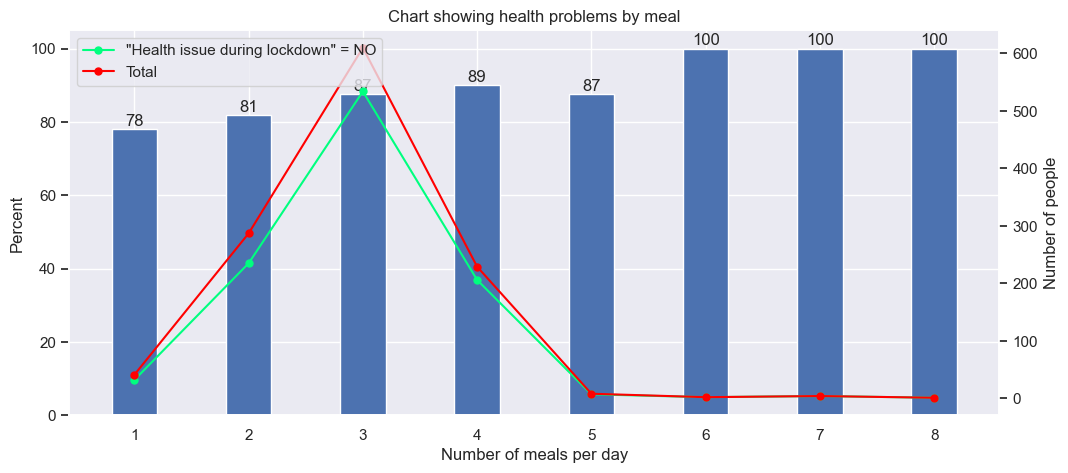

In [62]:
fig, ax1 = plt.subplots(figsize = (12, 5))

x = [1, 2, 3, 4, 5, 6, 7, 8]
y = ratio[x]*100

yy1 = sum_pp.values
yy2 = sum_pp_N.values

ax2 = ax1.twinx()
plot = ax1.bar(x, y, width = 0.4)
for value in plot:
    height = value.get_height()
    ax1.text(value.get_x() + value.get_width()/2., 1.002*height,'%d' % int(height), ha='center', va='bottom')
    
ax2.plot(x, yy2, label = '"Health issue during lockdown" = NO', marker='o', markersize=5, linestyle='-',c = 'springgreen')
ax2.plot(x, yy1, label = 'Total', marker='o', markersize=5, linestyle='-',c = 'red')

ax1.set_ylabel('Percent')
ax1.set_xlabel("Number of meals per day")
ax2.set_ylabel('Number of people')
ax2.legend(loc="upper left" )
ax2.set_title('Chart showing health problems by meal')
plt.grid(False)
plt.show()

#### Nhận xét:
- Các cột tăng dần lên chứng tỏ việc chia nhiều buổi ăn nhỏ trong ngày sẽ giúp cơ thể hấp thu chất dinh dưỡng tốt hơn từ đó hạn chế việc gặp phải các vấn đề về sức khỏe. 
- Đa số học sinh đúng 3 bữa một ngày.
- Việc ăn từ 6 bữa trở lên thường dành cho các vận động viên, khi này các vấn đề về sức khỏe có thể gặp phải gần như bằng 0.
- Phần trăm người không gặp vấn đề sức khi ăn 1 buổi một ngày là thấp nhất - min (78%) hay khi ăn một buổi một ngày khả năng cao sẽ xảy ra các vấn đề về sức khỏe. 

Vì vậy, vấn đề về sức khỏe xả ra nhiều nhất rơi vào **min** và không gặp các vấn đề sức khỏe nhất cũng rơi vào **max** của thuộc tính `Number of meals per day`.

#### Xét thuộc tính `Time spent on sleep`

Chia dữ liệu thành 2 phần:
- Dữ liệu có `Time spent on sleep` trong khoảng từ 6 đến 9 tiếng mỗi ngày, là dữ liệu có thời gian ngủ hợp lý.
- Dữ liệu có `Time spent on sleep` < 6 tiếng hoặc > 9 tiếng, là dữ liệu có thời gian ngủ không hợp lý.
 

Ta lọc dữ liệu chọn nhóm dữ liệu có thời gian ngủ <= 6 hoặc >= 9 và tính tỉ lệ số người ngủ x(h) không có vấn đề sức khỏe trên số người ngủ x(h). Từ đó tính trung bình cộng tập tỉ lệ trên.

In [63]:
filter1 = df['Time spent on sleep'] <= 6
filter2 = df['Time spent on sleep'] >= 9

tmp = df.where( filter2 | filter1) # Lọc các dữ liệu thỏa điều kiện

#Tính tỉ lệ số người ngủ x(h) không có vấn đề sức khỏe trên số người ngủ x(h)
z = tmp[tmp['Health issue during lockdown'] == 'NO']['Time spent on sleep'].value_counts()/ tmp['Time spent on sleep'].value_counts()
bad = np.mean(z.values) # Trung bình cộng tập tỉ lệ trên.
bad

0.877407196763318

Ta lọc dữ liệu chọn nhóm dữ liệu có thời gian ngủ 6 < và < 9 và tính tỉ lệ số người ngủ x(h) không có vấn đề sức khỏe trên số người ngủ x(h). Từ đó tính trung bình cộng tập tỉ lệ trên.

In [64]:
filter1 = df['Time spent on sleep'] > 6
filter2 = df['Time spent on sleep'] < 9

tmp = df.where( filter2 & filter1)
z = tmp[tmp['Health issue during lockdown'] == 'NO']['Time spent on sleep'].value_counts()/ tmp['Time spent on sleep'].value_counts()
good = np.mean(z.values)
good

0.9641376201923078

Ta sẽ dùng **biểu đồ cột** để thể hiện phần trăm thời gian ngủ không gây vấn đề sức khỏe của hai tỉ lệ trên.

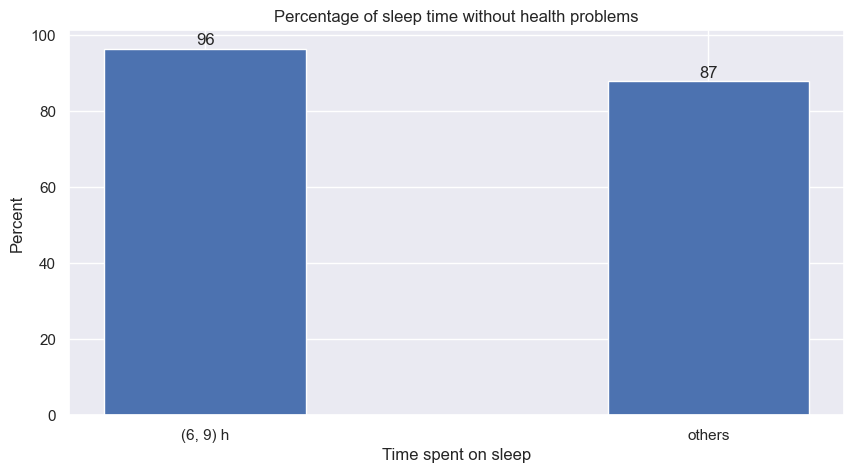

In [65]:
fig = plt.figure(figsize = (10, 5))
x = ['(6, 9) h', 'others']
y = [good*100, bad*100]
plot = plt.bar(x, y, width = 0.4)

for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,1.002*height,'%d' % int(height), ha='center', va='bottom')
    
plt.xlabel("Time spent on sleep")
# plt.set_xticks(y)
plt.ylabel("Percent")
plt.title("Percentage of sleep time without health problems")
plt.show()

#### Nhận xét:
- Nhìn chung các sinh viên bên trong dữ liệu đều có thời gian ngủ từ 4 tiếng trở lên nên cũng không quá nhiều vấn đề sức khỏe được xảy ra hay phần trăm không có vấn đề về sức khỏe cao.
- Khoảng thời gian ngủ được cho là tốt( khoảng (6, 9)) thì có phần trăm không xảy ra các vấn đề về sức khỏe cao (96%) hơn là khi ngủ ngoài khoảng thời gian này. 

#### Xét thuộc tính `Time spent on fitness`

Chia dữ liệu thành 2 phần:
- Dữ liệu có `Time spent on fitness` = 0, là dữ liệu mà người thực hiện khảo sát không tập thể dục.
- Dữ liệu có `Time spent on fitness` > 0 là dữ liệu mà người thực hiện khảo sát có tập thể dục.

Ta lọc dữ liệu chọn nhóm dữ liệu có thời gian tập thể dục là 0 và tính tỉ lệ số người không tập thể dục không có vấn đề sức khỏe trên số người không tập thể dục. Từ đó, tính trung bình cộng tập tỉ lệ trên.

In [66]:
filter = df['Time spent on fitness'] == 0
tmp = df.where( filter)
# Tính tỉ lệ số người không tập thể dục không có vấn đề sức khỏe trên số người không tập thể dục
z = tmp[tmp['Health issue during lockdown'] == 'NO']['Time spent on fitness'].value_counts()/ tmp['Time spent on fitness'].value_counts()
bad = np.mean(z.values) # Trung bình của tập tỉ lệ.
bad

0.8281622911694511

Ta lọc dữ liệu chọn nhóm dữ liệu có thời gian tập thể dục > 0 và tính tỉ lệ số người có tập thể dục không có vấn đề sức khỏe trên số người có tập thể dục. Từ đó, tính trung bình cộng tập tỉ lệ trên.

In [67]:
filter = df['Time spent on fitness'] > 0
tmp = df.where( filter)
z = tmp[tmp['Health issue during lockdown'] == 'NO']['Time spent on fitness'].value_counts()/ tmp['Time spent on fitness'].value_counts()
good = np.mean(z.values)
good

0.9147125704484195

Ta tiếp dùng **biểu đồ cột** để thể hiện hai phần tỉ lệ trên.

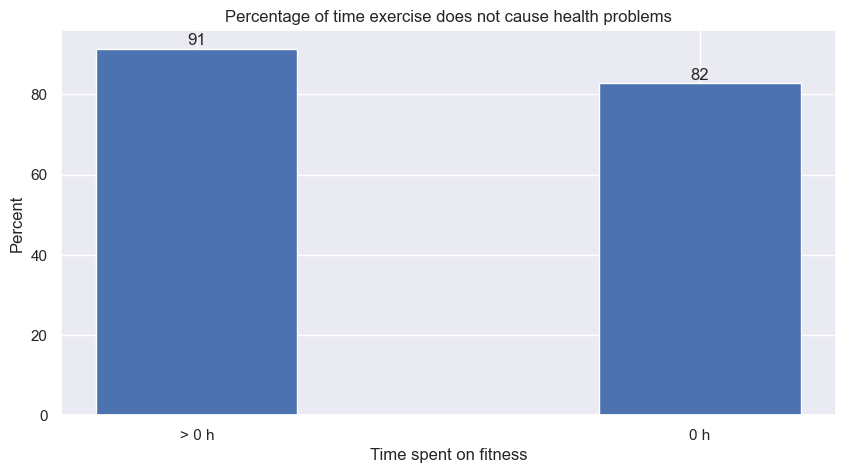

In [68]:
fig = plt.figure(figsize = (10, 5))
x = ['> 0 h', '0 h']
y = [good*100, bad*100]
plot = plt.bar(x, y, width = 0.4)

for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,1.002*height,'%d' % int(height), ha='center', va='bottom')
    
plt.xlabel("Time spent on fitness")
# plt.set_xticks(y)
plt.ylabel("Percent")
plt.title("Percentage of time exercise does not cause health problems")
plt.show()

#### Nhận xét:
- Dữ liệu cho thấy việc có tập thể dục cho tỉ lệ phần trăm không có vấn đề sức khỏe cao hơn 10% so với những người không tập thể dục.

#### Xét thuộc tính `Change in your weight`

Xem xét thuộc tính `Change in your weight`

In [69]:
df['Change in your weight'].value_counts()

Change in your weight
Remain Constant    535
Increased          438
Decreased          209
Name: count, dtype: int64

In [70]:
df[df['Health issue during lockdown'] == 'YES']['Change in your weight'].value_counts()

Change in your weight
Increased          59
Remain Constant    52
Decreased          50
Name: count, dtype: int64

Tính tỉ lệ khi `Health issue during lockdown` là NO.

In [71]:
percent1 = df[df['Health issue during lockdown'] == 'NO']['Change in your weight'].value_counts()/df['Change in your weight'].value_counts()
percent1 = percent1.sort_index()
percent1

Change in your weight
Decreased          0.760766
Increased          0.865297
Remain Constant    0.902804
Name: count, dtype: float64

Tính tỉ lệ khi `Health issue during lockdown` là YES.

In [72]:
percent2 = df[df['Health issue during lockdown'] == 'YES']['Change in your weight'].value_counts()/df['Change in your weight'].value_counts()
percent2 = percent2.sort_index()
percent2

Change in your weight
Decreased          0.239234
Increased          0.134703
Remain Constant    0.097196
Name: count, dtype: float64

Dùng **biểu đồ cột đôi** để trực quan. Cột xanh thể hiện `Change in your weight` khi không có vấn đề sức khỏe, cột cam ngược lại. Kết hợp đường nối các đỉnh của cột từ đó dễ dàng so sánh và nhìn nhận rõ hơn.

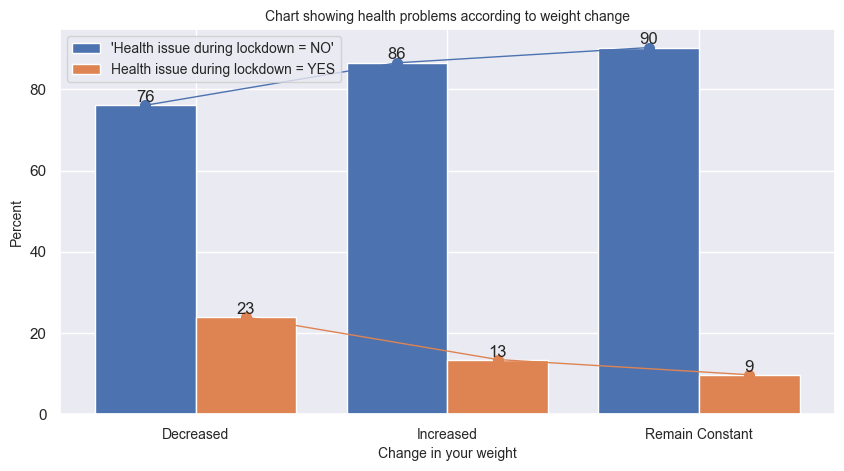

In [73]:
x = percent1.keys()
y1 = percent1.values*100
y2 = percent2.values*100
index = np.arange(1, len(x) + 1)
width = 0.4
plt.figure(figsize=(10, 5))
plot = plt.bar(index, y1, width)
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,1.002*height,'%d' % int(height), ha='center', va='bottom')

plot1 = plt.bar(index + width, y2, width)
for value in plot1:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,1.002*height,'%d' % int(height), ha='center', va='bottom')
    
plt.xticks(index + width/2, x, fontsize = 10)
plt.legend(["'Health issue during lockdown = NO'", "Health issue during lockdown = YES"], fontsize = 10)
plt.plot(index, y1, marker='o', markersize=7, linestyle='-', linewidth=1)
plt.plot(index + width, y2, marker='o', markersize=7, linestyle='-', linewidth=1)
plt.xlabel("Change in your weight", fontsize = 10)
plt.ylabel("Percent", fontsize = 10)
plt.title("Chart showing health problems according to weight change", fontsize = 10)
# plt.legend(loc="upper left")

plt.grid(True)

#### Nhận xét:
- Cột xanh cho ta thấy phần trăm không có vấn đề sức khỏe cao nhất ở nhóm người không thay đổi cân nặng. Việc có biến đổi cân nặng tăng khả năng gây ra các vấn đề về sức khỏe cụ thể là việc giảm cần sẽ dễ gây ra các vấn đề về sức khỏe hơn (cột xanh của Decreased thấp nhất).
- Cột cam thể hiện hoàn toàn ngược lại. Khi gặp các vấn đề về sức khỏe, cột không đổi cân nặng thấp nhất , cột giảm cân là cao nhất.

Có vẻ như việc tăng cân chưa chắc đã đáng lo, đáng lo ngại là việc giảm cân !!!

#### **Xây dựng mô hình:**
- **Nguồn cảm hứng:**
    - Theo sau việc trực quan dữ liệu cho thấy độ tương quan của các thuộc tính khác so với thuộc tính `Health issue during lockdown` từ đó nảy ra câu hỏi liệu có thể căn cứ vào các thuộc tính ấy mà dự đoán `Health issue during lockdown` hay không?
    - Vậy nên ta chọn mô hình Decision Tree thực hiện dự đoán thuộc tính `Health issue during lockdown`. <br><br>
    
- **Các thuộc tính sử dụng:**
    - Time spent on fitness
    - Time spent on sleep
    - Number of meals per day
    - Change in your weight
    - Time utilized<br><br>

- **Thuật toán sử dụng:**
    - Decision Tree <br><br>

- **Bước thực hiện:**
    - Tạo tập dữ liệu features là X và tập cần dự đoán Y. 
    - Chia tập dữ liệu thành 2 phần: Test (30%), Train (70%).
    - Chạy mô hình với tập dữ liệu Train.
    - Đánh giá hiệu suất model với tập test.

Đầu tiên, ta chọn tập dữ liệu đặc trưng (features).

In [74]:
feature_cols = ['Time spent on sleep', 'Time spent on fitness', 'Number of meals per day', 'Change in your weight', 'Time utilized']
X = df[feature_cols] # Features
X = X.copy()
y = df['Health issue during lockdown'] # Target variable
X

Time spent on sleep  Time spent on fitness  Number of meals per day  \
0                     7.0                    0.0                        4   
1                    10.0                    2.0                        3   
2                     6.0                    0.0                        3   
3                     6.0                    1.0                        3   
4                     8.0                    1.0                        4   
...                   ...                    ...                      ...   
1177                  8.0                    1.0                        3   
1178                  9.0                    1.0                        4   
1179                  8.0                    0.5                        4   
1180                  8.0                    1.0                        4   
1181                  7.0                    0.5                        3   

     Change in your weight Time utilized  
0                Increased           YES  
1                Decreased           YES  
2          Remain Constant            NO  
3                Decreased            NO  
4          Remain Constant            NO  
...                    ...           ...  
1177             Decreased           YES  
1178       Remain Constant           YES  
1179             Decreased            NO  
1180       Remain Constant           YES  
1181       Remain Constant           YES  

[1182 rows x 5 columns]

Sau đó, ta chuẩn hóa dữ liệu dạng `numeric`.

In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Time spent on sleep      1182 non-null   float64
 1   Time spent on fitness    1182 non-null   float64
 2   Number of meals per day  1182 non-null   int64  
 3   Change in your weight    1182 non-null   object 
 4   Time utilized            1182 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 46.3+ KB


In [76]:
X['Time utilized'] = pd.get_dummies(X['Time utilized'],drop_first=True).astype('int64')
tmp_weight = {'Increased': 1, 'Decreased': 2, 'Remain Constant': 3 } 
X['Change in your weight'] = X['Change in your weight'].map(tmp_weight)
X

Time spent on sleep  Time spent on fitness  Number of meals per day  \
0                     7.0                    0.0                        4   
1                    10.0                    2.0                        3   
2                     6.0                    0.0                        3   
3                     6.0                    1.0                        3   
4                     8.0                    1.0                        4   
...                   ...                    ...                      ...   
1177                  8.0                    1.0                        3   
1178                  9.0                    1.0                        4   
1179                  8.0                    0.5                        4   
1180                  8.0                    1.0                        4   
1181                  7.0                    0.5                        3   

      Change in your weight  Time utilized  
0                         1              1  
1                         2              1  
2                         3              0  
3                         2              0  
4                         3              0  
...                     ...            ...  
1177                      2              1  
1178                      3              1  
1179                      2              0  
1180                      3              1  
1181                      3              1  

[1182 rows x 5 columns]

Xem độ tương quan giữ các cột.

In [77]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

Thực hiện Spliting the dataset để tránh việc overfitting trong quá trình học ta chia tập dữ liệu thành 2 phần 70% dùng để train và 30% dùng để test (XX, YY -> X_train, X_test, y_train, y_test) 

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

Đến đây ta thực hiện huấn luyện mô hình học máy.

In [79]:
Dtree = DecisionTreeClassifier()
Dtree = Dtree.fit(X_train,y_train)

#Predict 
y_pred = Dtree.predict(X_test)

Cuối cùng, ta thực hiện việc đánh giá hiệu suất model với tập test.

In [80]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8338028169014085


#### Kết luận:
- Mô hình cho Accuracy ~ 83% là độ chính xác cao, tốt đối với mô hình này.
- Ta có thể áp dụng mô hình trên để dự đoán việc xảy ra các vấn đề về sức khỏe theo một số thuộc tính thói quen khác của sinh viên.